# 1. Fitting Ne lines in a loop
- This notebook shows how to fit all lines in a folder defined by path
- You tweak the fit for a single line, and then use this to fit all lines. You can then refit lines with high residuals/offsets differing from the rest

## Downloading locally
- You can install DiadFit through PyPI, simply uncomment this line. You only need to run this once per computer (until you want to get an upgraded version)
- Uncomment this line if you havent installed DiadFit, or are running a much older version. 

In [1]:
#!pip install --upgrade DiadFit

## Now import the packages you need
- When you communicate bugs with Penny, make sure you specify the version here.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import DiadFit as pf
# This needs to be 0.0.68 or higher!
pf.__version__

'0.0.78'

##  Specifying paths
- Put your path here, e.g. where in your computer the spectra and metadata are saved

In [3]:
import os
DayFolder=os.getcwd()
meta_path=DayFolder +  '\Spectra'
spectra_path=DayFolder + '\Spectra'
filetype='headless_txt'
# What is your file extension? .txt, .csv, .xlsx?
file_ext='.txt'
# Does your file start with a prefix? E.g 01 Ne_line.txt?
prefix=False
prefix_str=' '
# Does your instrument have TruPower?
TruPower=True
# Save settings to a file to use in all other notebooks
pf.save_settings(meta_path, spectra_path, filetype, prefix, prefix_str, file_ext, TruPower)


In [4]:
# This step gets all your Ne files. Enter ID_str as a string in only your Neon files, exclude strings not in Ne files. So here we take files with 'Ne' in the name and exclude those with 'diad' in the name. 
Ne_files=pf.get_files(path=spectra_path,
file_ext='txt', ID_str='Ne', 
exclude_str=['diad'], sort=False)

Ne_files

['170117 1353 Ne on laser off.txt',
 '170117 1403 Ne on laser off.txt',
 '170117 1412 Ne on laser off.txt',
 '170117 1419 Ne on laser off.txt',
 '170117 1432 Ne on laser off.txt',
 '170117 1450 Ne on laser off.txt',
 '170117 1457 Ne on laser off.txt',
 '170117 1503 Ne on laser off.txt',
 '170117 1509 Ne on laser off.txt',
 '170117 1516 Ne on laser off.txt',
 '170117 1526 Ne on laser off.txt',
 '170117 1534 Ne on laser off.txt',
 '170117 1541 Ne on laser off.txt',
 '170117 1548 Ne on laser off.txt',
 '170124 0907 Ne on laser off.txt',
 '170124 0915 Ne on laser off.txt',
 '170124 0922 Ne on laser off.txt',
 '170124 0929 Ne on laser off.txt',
 '170124 0935 Ne on laser off.txt',
 '170124 0945 Ne on laser off.txt',
 '170124 1005 Ne on laser off.txt',
 '170124 1012 Ne on laser off.txt',
 '170124 1020 Ne on laser off.txt',
 '170124 1027 Ne on laser off.txt',
 '170124 Ne on laser off calibration.txt']

### Get Ne line positions for your specific laser wavelength
- At the moment, this returns any Ne lines with intensity >2000 in the NIST databook, although you can change this!

In [5]:
wavelength =514.532 # Specify the specific wavelength of your laser 
df_Ne=pf.calculate_Ne_line_positions(wavelength=wavelength, 
cut_off_intensity=2000)
df_Ne.head()

Raman_shift (cm-1)  Intensity  Ne emission line in air
3          1031.306217     2500.0                543.36513
15         1458.469378     5000.0                556.27662
18         1458.469378     5000.0                556.27662
26         1756.856843     5000.0                565.66588
33         1950.250061     5000.0                571.92248

### Calculate the ideal distance between the two lines you are selecting
- This finds the closest line in the table above for each selected line

In [7]:
line_1=1031
line_2=1458
ideal_split=pf.calculate_Ne_splitting(wavelength=wavelength, 
line1_shift=line_1, line2_shift=line_2,
cut_off_intensity=2000)
ideal_split

Ne_Split       Line_1       Line_2  Entered Pos Line 1  \
0  427.163161  1031.306217  1458.469378                1031   

   Entered Pos Line 2  
0                1458

## Select one file to tweak the fit for
- You can either do this numerically, or by specifiying the filename between ''

In [8]:
i=0 # Select one file
filename=Ne_files[i] 
print(filename)

170117 1353 Ne on laser off.txt


## Plot Ne lines to inspect
- This function allows you to inspect your spectra, and also uses scipy find peaks to get a first guess of the peak positions, which speeds up the voigt fitting in the later part of the notebook
- This also prints the heights of the other peaks so you could choose other Neons if you wanted to

I flipped


Peak1_cent  Peak1_height  Peak2_cent  Peak2_height  Peak1_prom   Peak2_prom
0   1031.7411     360.48358   1458.9943      1213.611  342.435371  1195.562791

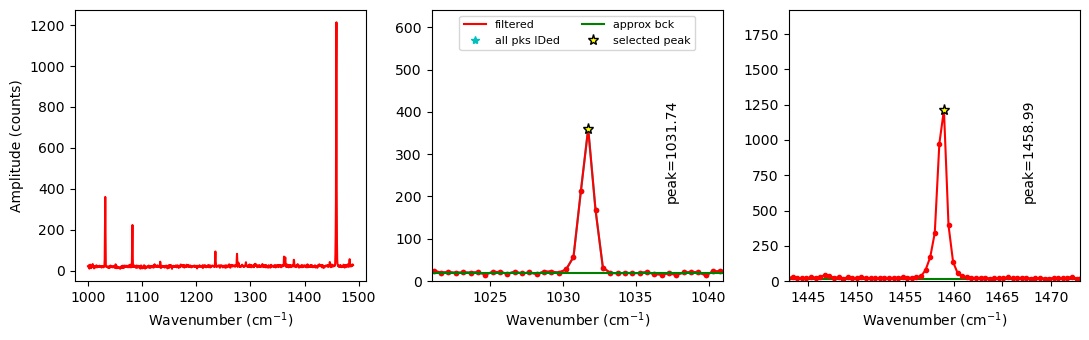

In [9]:
exclude_range_1=None
exclude_range_2=None

Neon_id_config=pf.Neon_id_config(height=10,  distance=1, prominence=10, 
            width=1, threshold=0.6,
            peak1_cent=line_1, peak2_cent=line_2, n_peaks=6, 
            exclude_range_1=exclude_range_1, 
            exclude_range_2=exclude_range_2)
Neon_id_config

Ne, df_fit_params=pf.identify_Ne_lines(path=spectra_path,
filename=filename, filetype=filetype,
config=Neon_id_config, print_df=False)
df_fit_params

### Tweak peak parameters
- One important thing is the background positions, these are defined relative to the peak position. Once you tweak them for each instrument, you chould be good to go. 
- Another thing is how many peaks you want for Peak1, 'peaks_1', for the 1117 line, you'll need 2 if you have the clear secondary peak seen above. 

In [10]:
pf.Ne_peak_config()

Ne_peak_config(model_name='PseudoVoigtModel', N_poly_pk1_baseline=1, N_poly_pk2_baseline=1, lower_bck_pk1=(-50, -25), upper_bck1_pk1=(8, 15), upper_bck2_pk1=(30, 50), lower_bck_pk2=(-44.2, -22), upper_bck1_pk2=(15, 50), upper_bck2_pk2=(50, 51), peaks_1=2, DeltaNe_ideal=330.477634, x_range_baseline_pk1=20, y_range_baseline_pk1=200, x_range_baseline_pk2=20, y_range_baseline_pk2=200, pk1_sigma=0.4, pk2_sigma=0.4, x_range_peak=15, x_range_residual=7, LH_offset_mini=(1.5, 3), x_span_pk1=None, x_span_pk2=None)

In [21]:
model_name='PseudoVoigtModel'
Ne_Config_est=pf.Ne_peak_config(model_name=model_name,
 DeltaNe_ideal=ideal_split['Ne_Split'], peaks_1=1, LH_offset_mini=[2, 5],
pk1_sigma=1, pk2_sigma=1.5, y_range_baseline_pk1=500, y_range_baseline_pk2=5000,
lower_bck_pk1=(-20, -5), upper_bck1_pk1=[10, 30], upper_bck2_pk1=[10, 30],
lower_bck_pk2=[-20, -10], upper_bck1_pk2=[10, 15], upper_bck2_pk2=[10, 15],
x_range_peak=5, x_span_pk1=[-5, 5], x_span_pk2=[-5, 5],
N_poly_pk2_baseline=2)

filename  1σ_Ne_Corr_test  1σ_Ne_Corr  \
0  170117 1353 Ne on laser off.txt         0.000023    0.000023   

   pk2_peak_cent  pk2_amplitude  pk2_sigma pk2_gamma  error_pk2  \
0    1458.814354    1661.175488   0.445643      None     0.0083   

   Peak2_Prop_Lor  pk1_peak_cent  ...  pk1_gamma  error_pk1 Peak1_Prop_Lor  \
0        0.711974    1031.689741  ...       None    0.00512       0.100865   

      deltaNe  Ne_Corr  Ne_Corr_min  Ne_Corr_max  residual_pk2  residual_pk1  \
0  427.124614  1.00009     1.000059     1.000122     17.561258      2.353537   

   residual_pk1+pk2  
0         19.914795  

[1 rows x 22 columns]

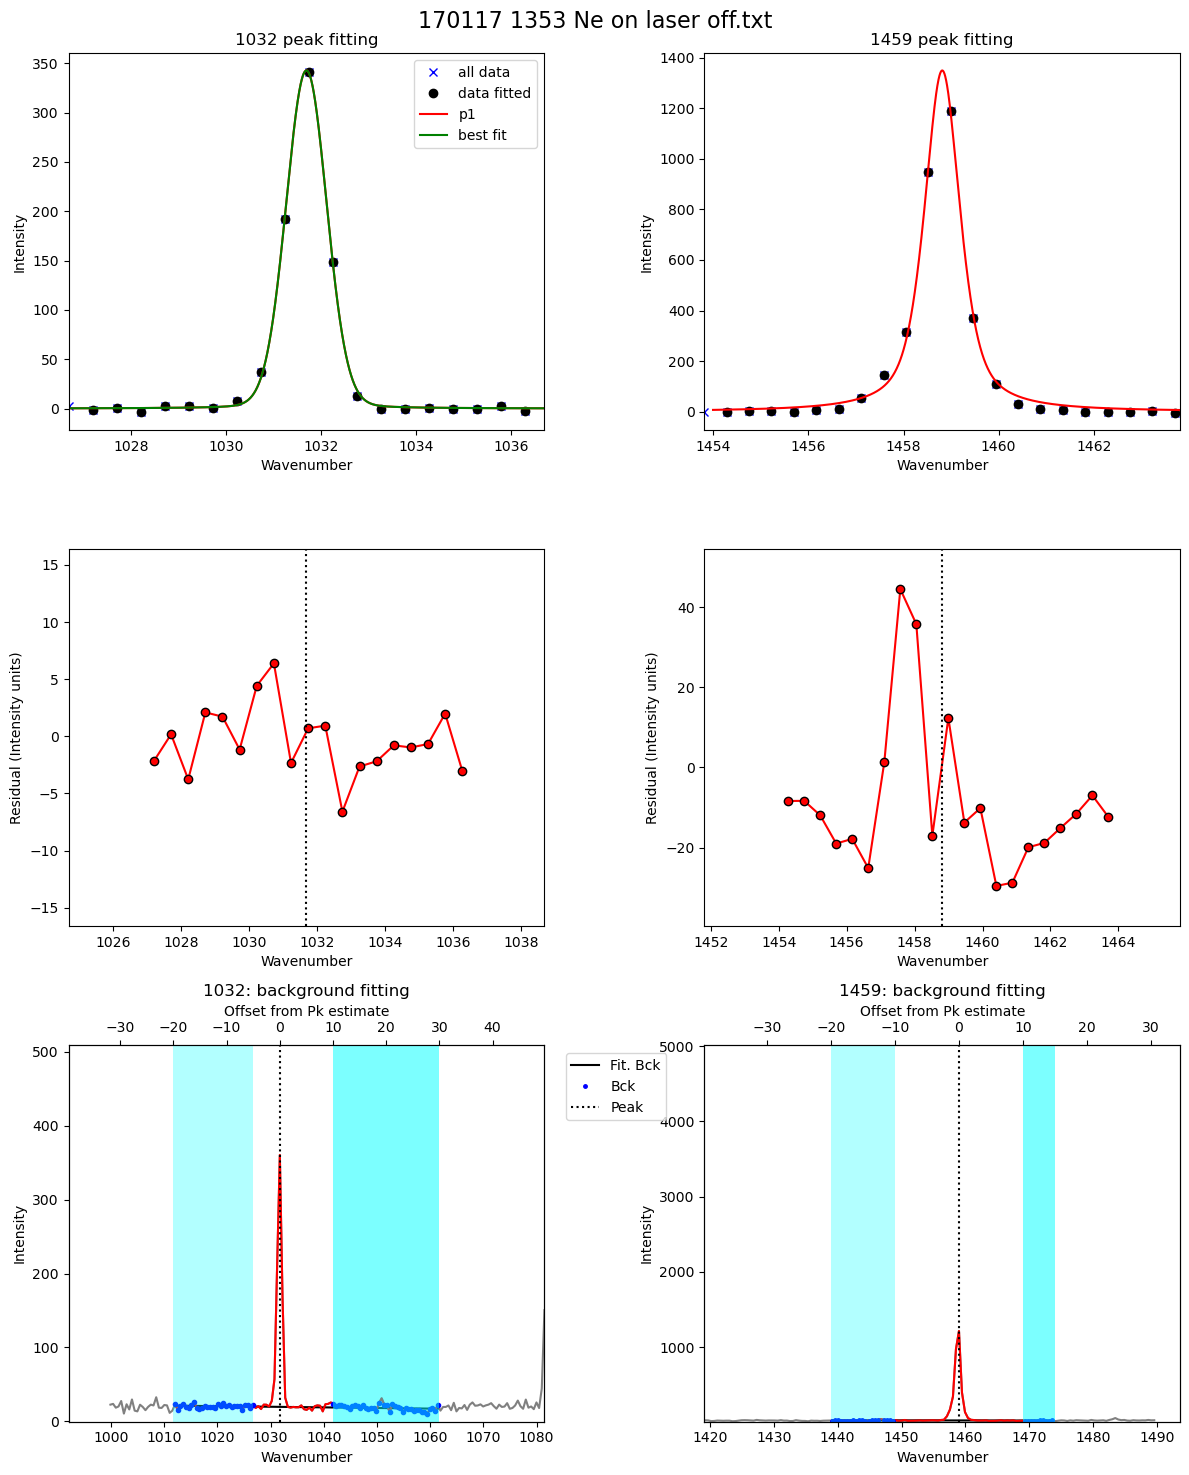

In [22]:

df_test_params=pf.fit_Ne_lines(Ne=Ne, filename=filename,
path=spectra_path, prefix=prefix,
config=Ne_Config_est,
    Ne_center_1=df_fit_params['Peak1_cent'].iloc[0], 
    Ne_center_2=df_fit_params['Peak2_cent'].iloc[0],
    Ne_prom_1=df_fit_params['Peak1_prom'].iloc[0],
    Ne_prom_2=df_fit_params['Peak2_prom'].iloc[0],
    const_params=False)                                                                 
                                                                     
display(df_test_params)

In [23]:
## Now tweak the values of the sigma to help with the looping - then for looping we let these parameters only vary +-20% between spectra
Ne_Config_est.pk1_sigma=df_test_params['pk1_sigma'][0]
Ne_Config_est.pk2_sigma=df_test_params['pk2_sigma'][0]


## Now fit all Ne files here using these parameters. 
- If you select plot_figure=False, the loop will be quick. 
- But if its True, you can to inspect the figures.

  0%|          | 0/25 [00:00<?, ?it/s]

I flipped
I flipped
I flipped
I flipped
I flipped
I flipped
I flipped
I flipped
I flipped
I flipped
I flipped
I flipped
I flipped
I flipped
I flipped
I flipped
I flipped
I flipped
I flipped
I flipped
I flipped


c:\users\penny\box\berkeley_new\diadfit_outer\src\DiadFit\ne_lines.py:1285: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ((ax3, ax2), (ax5, ax4), (ax1, ax0)) = plt.subplots(3,2, figsize = (12,15)) # adjust dimensions of figure here


I flipped
I flipped
I flipped
I flipped


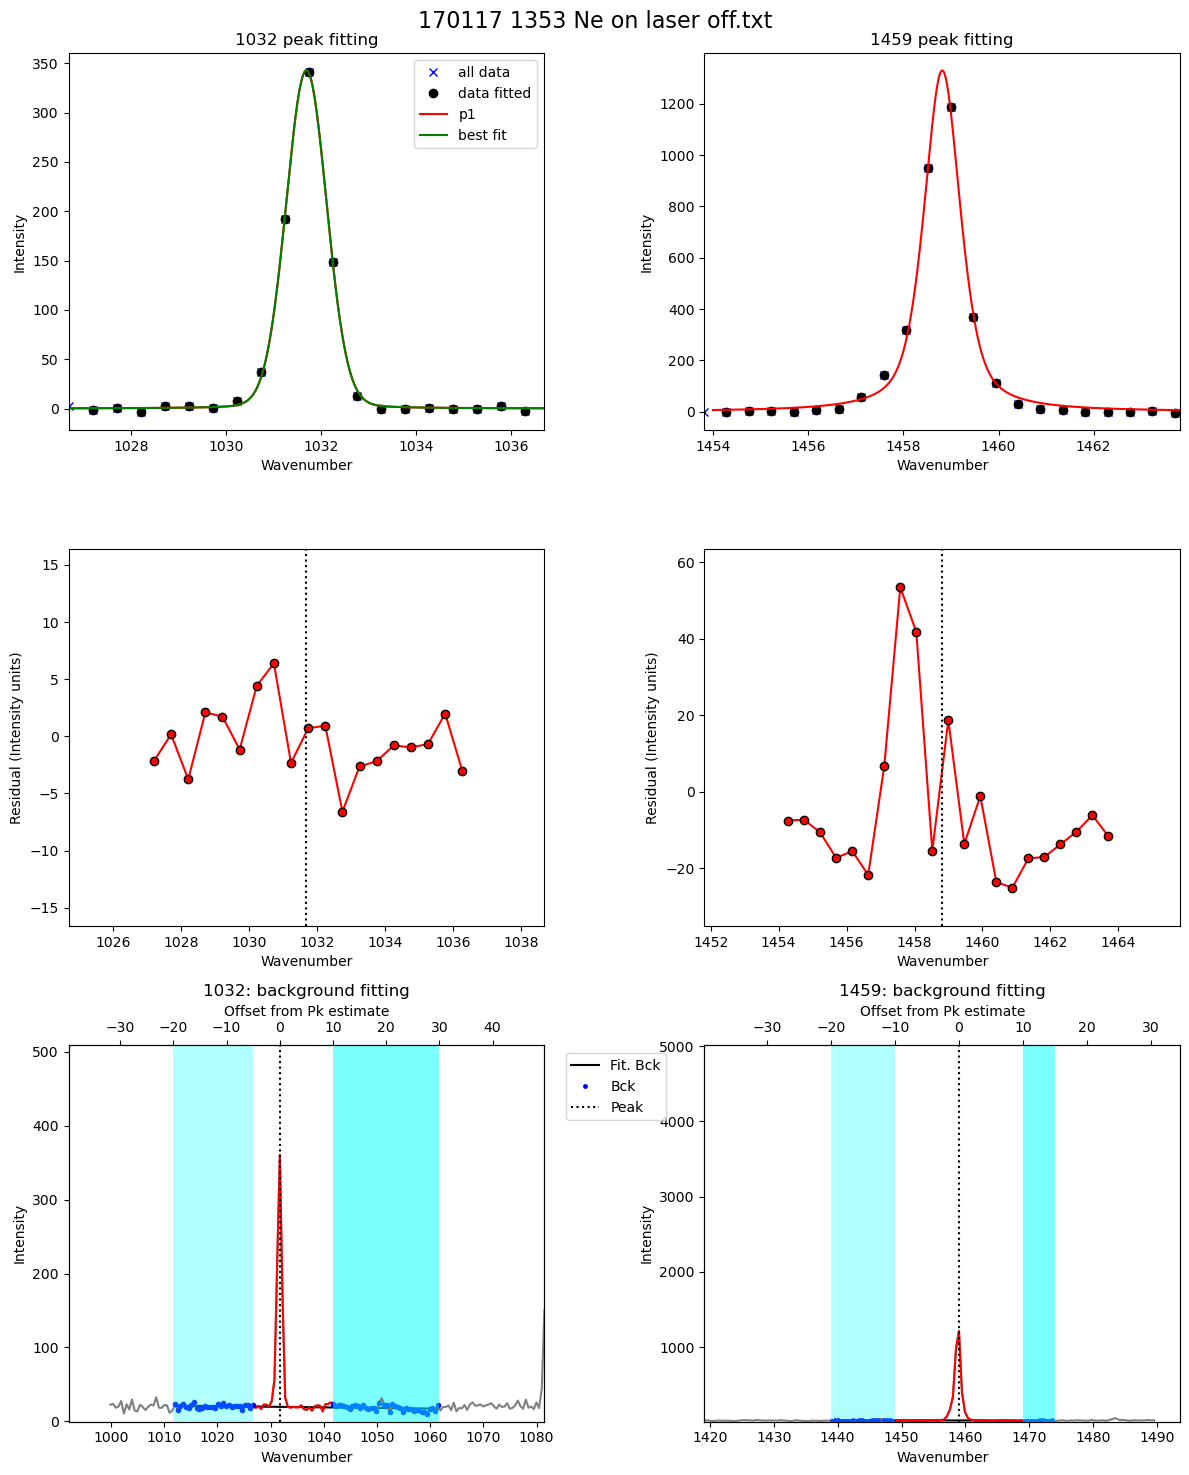

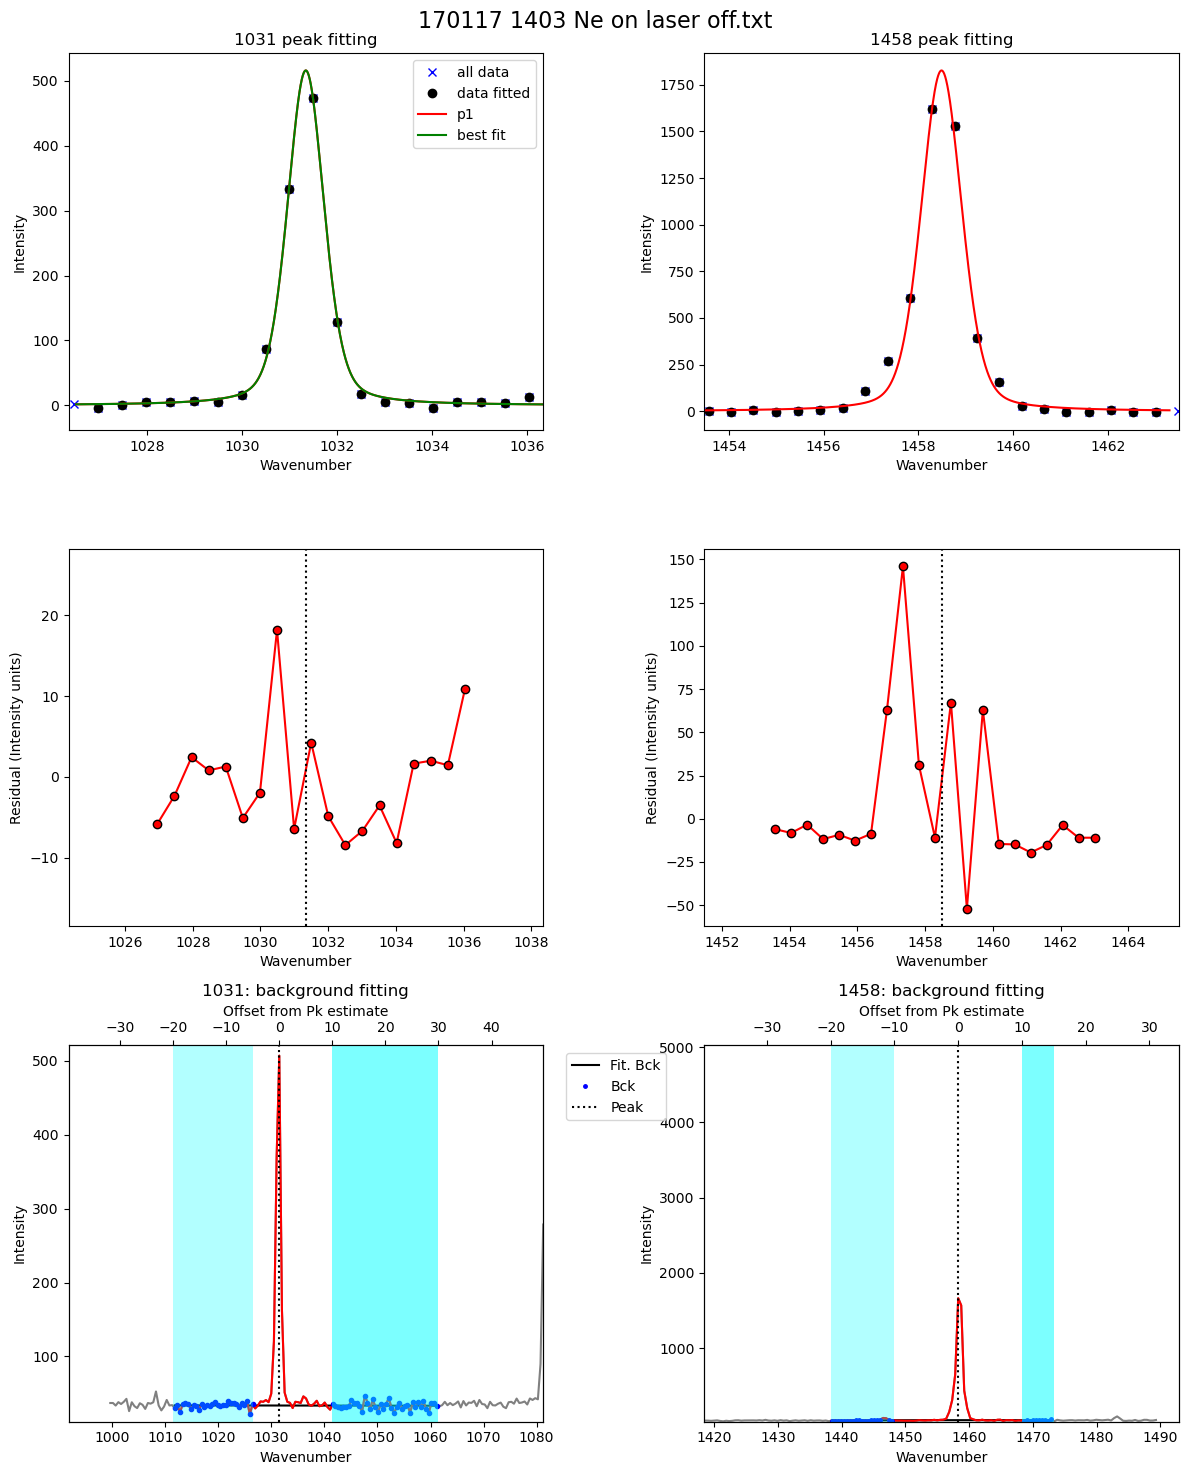

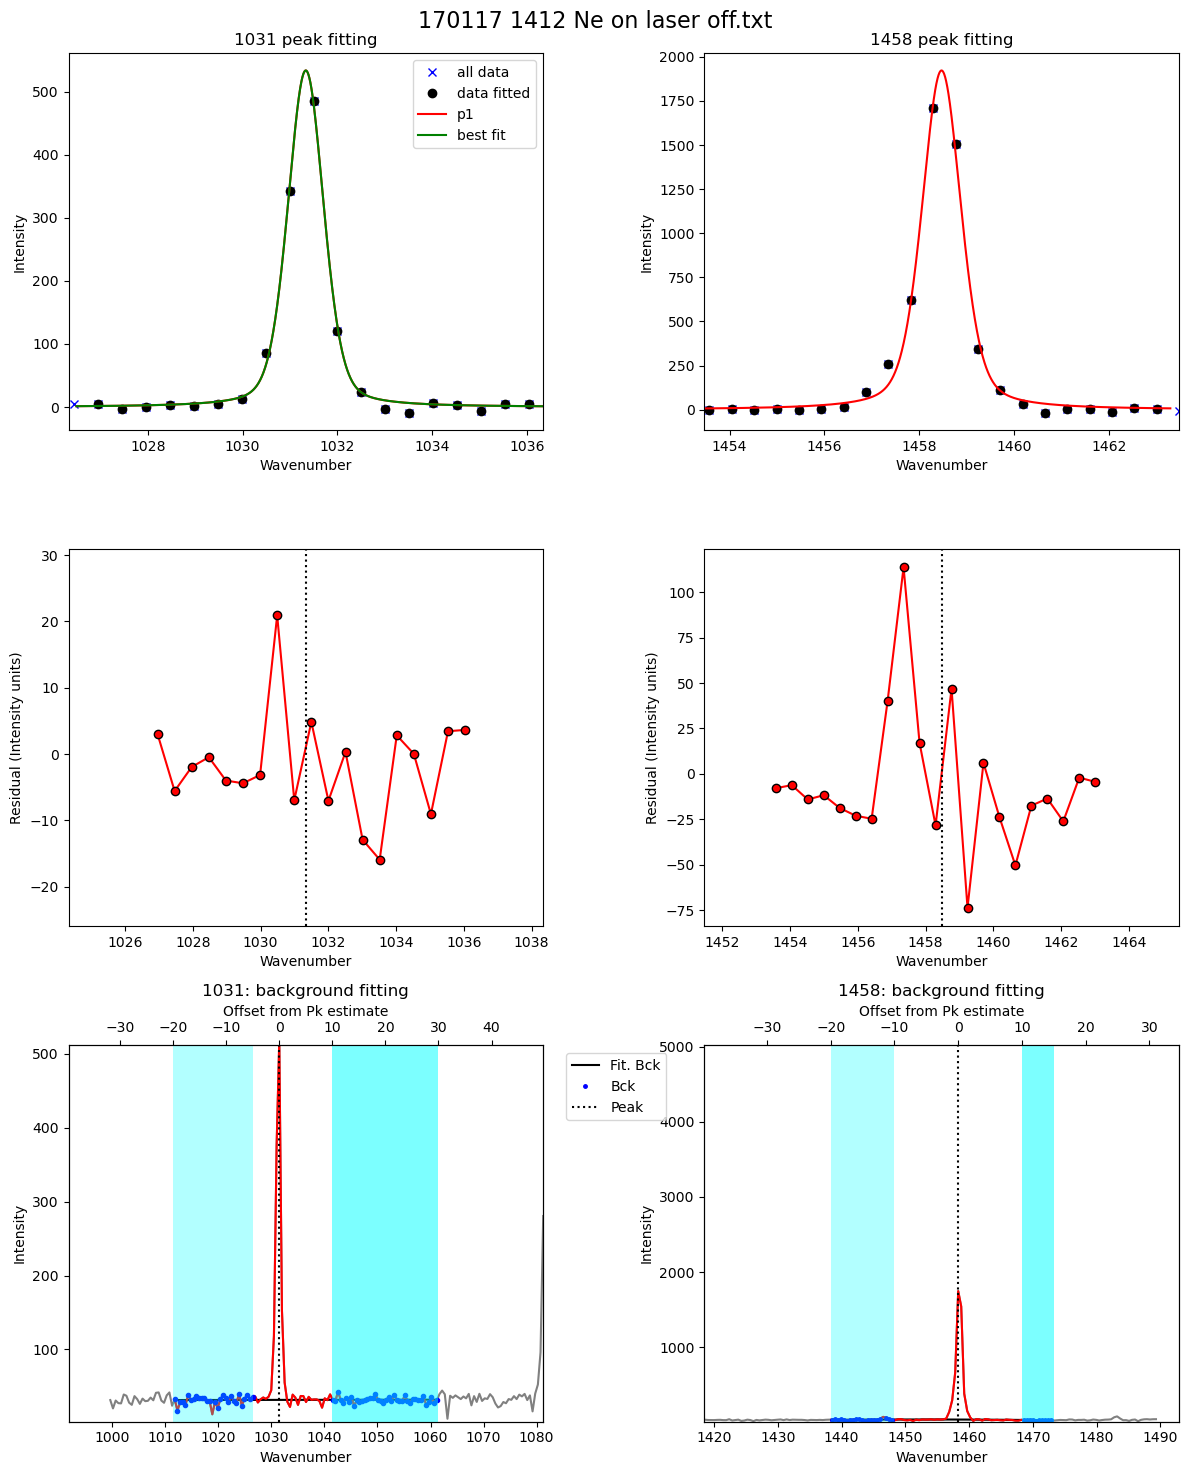

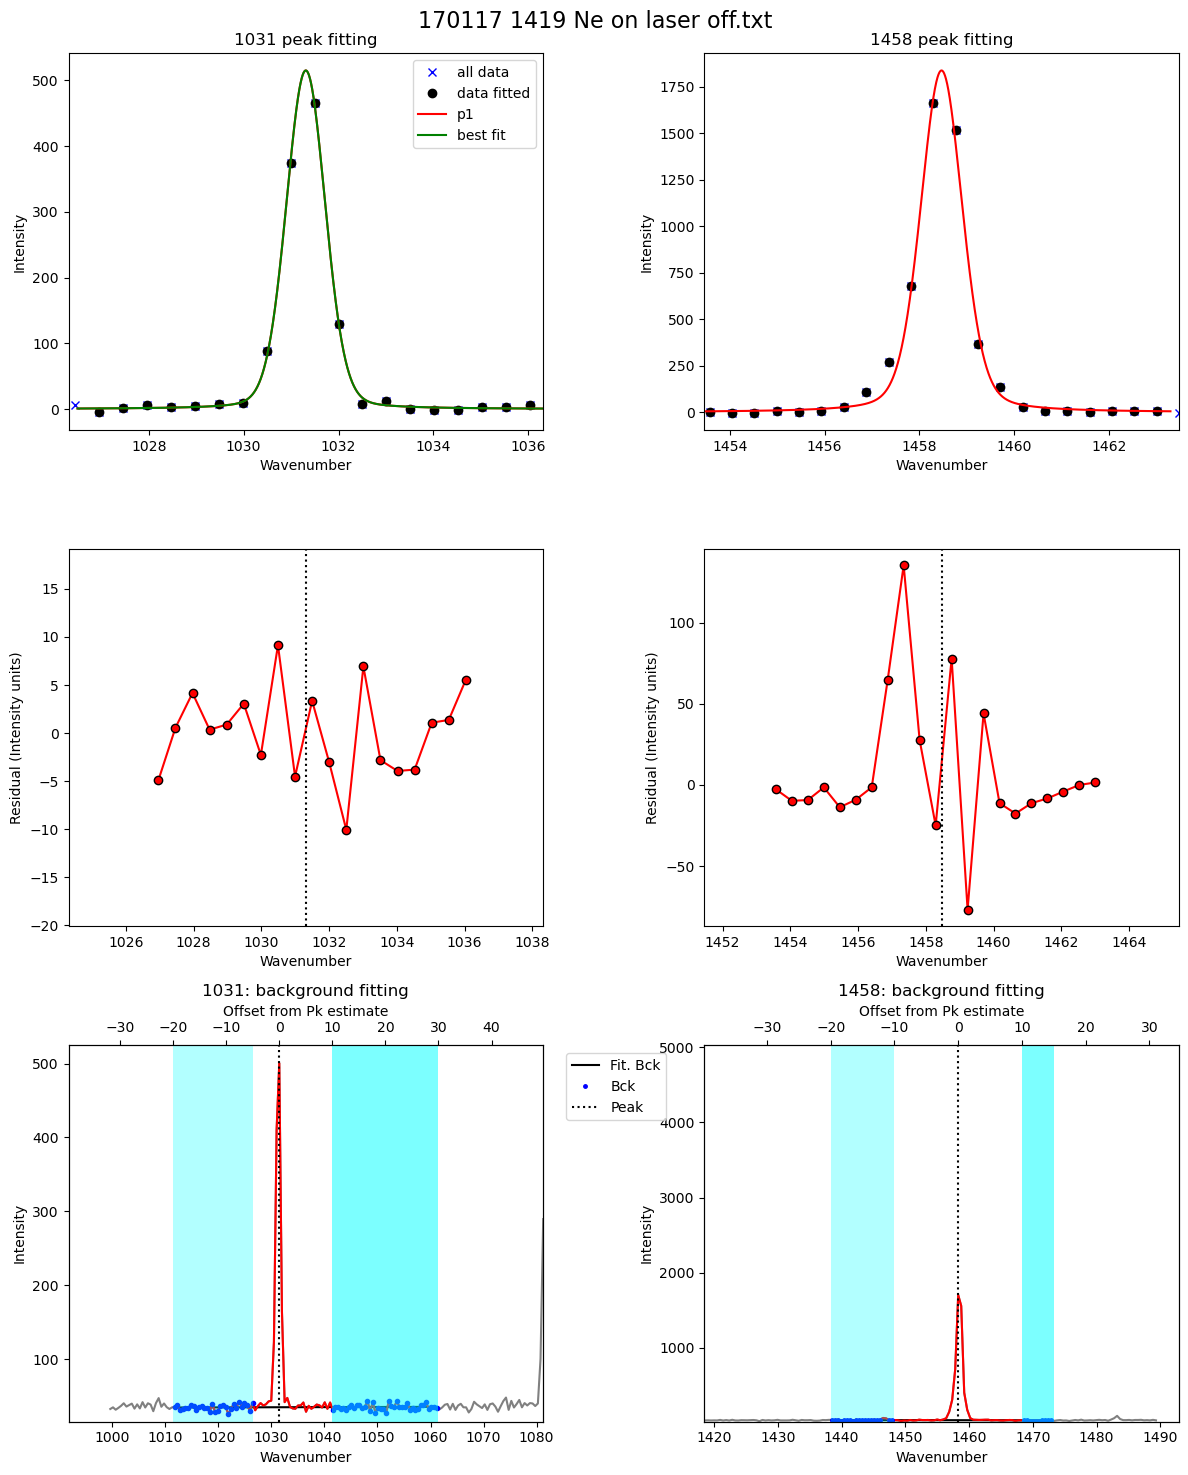

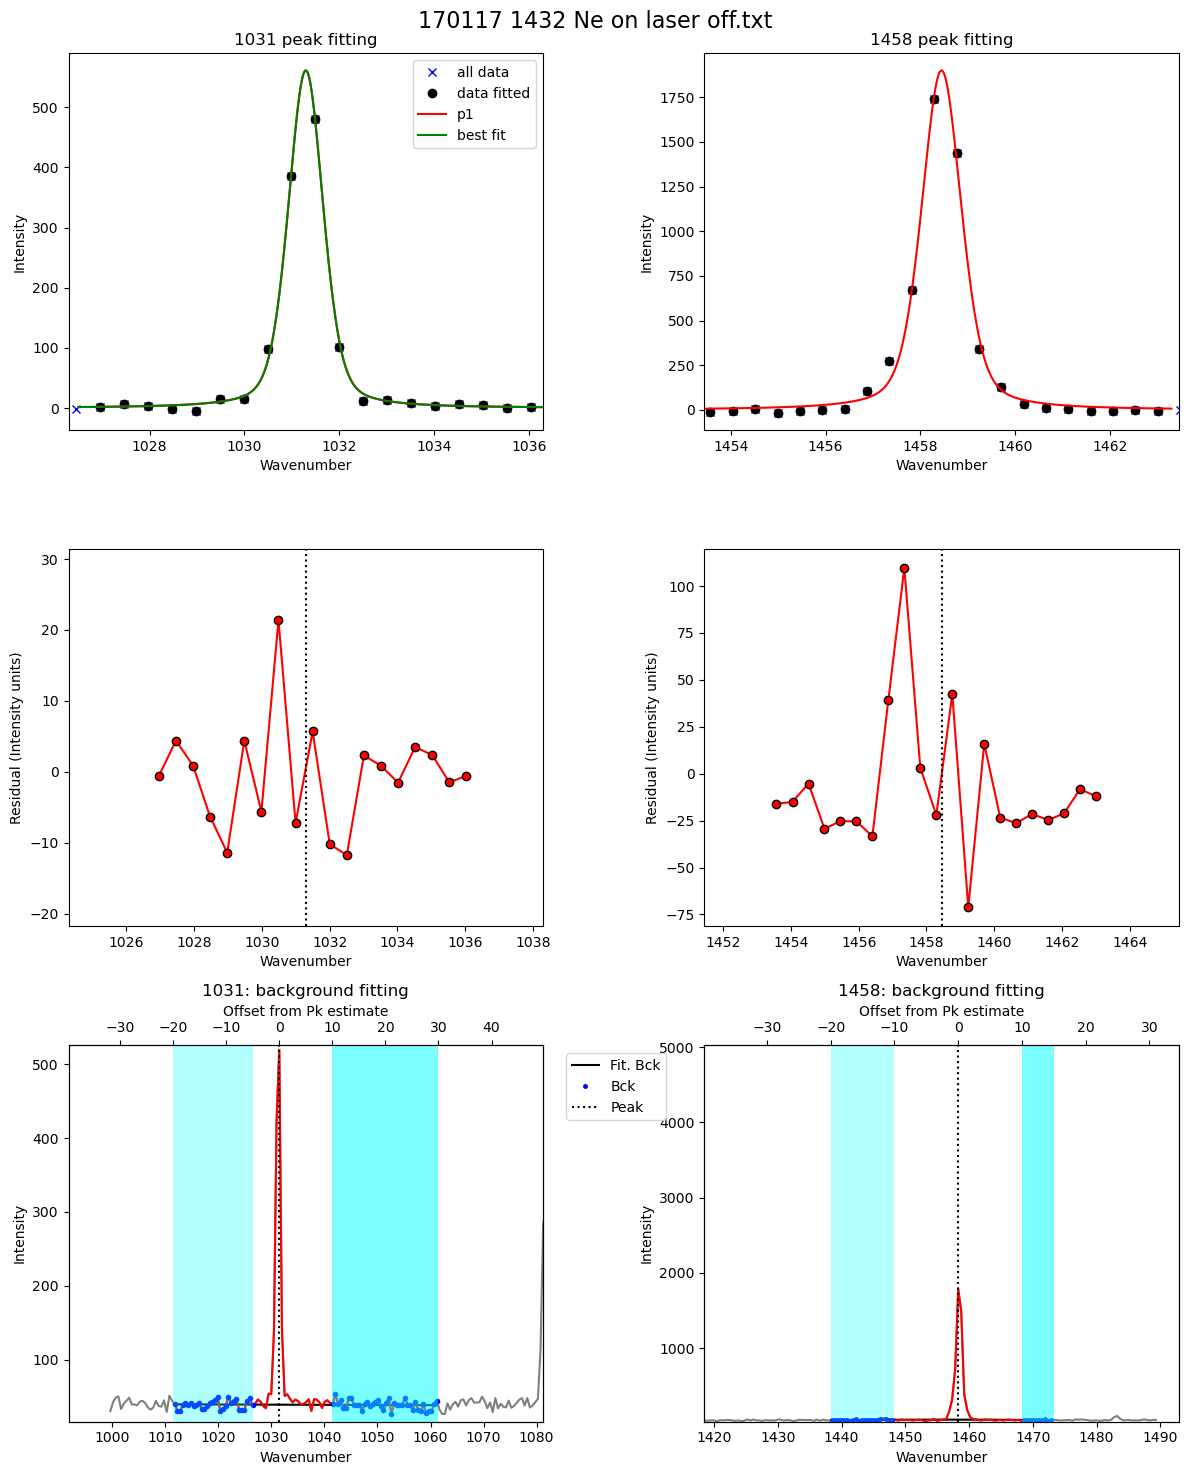

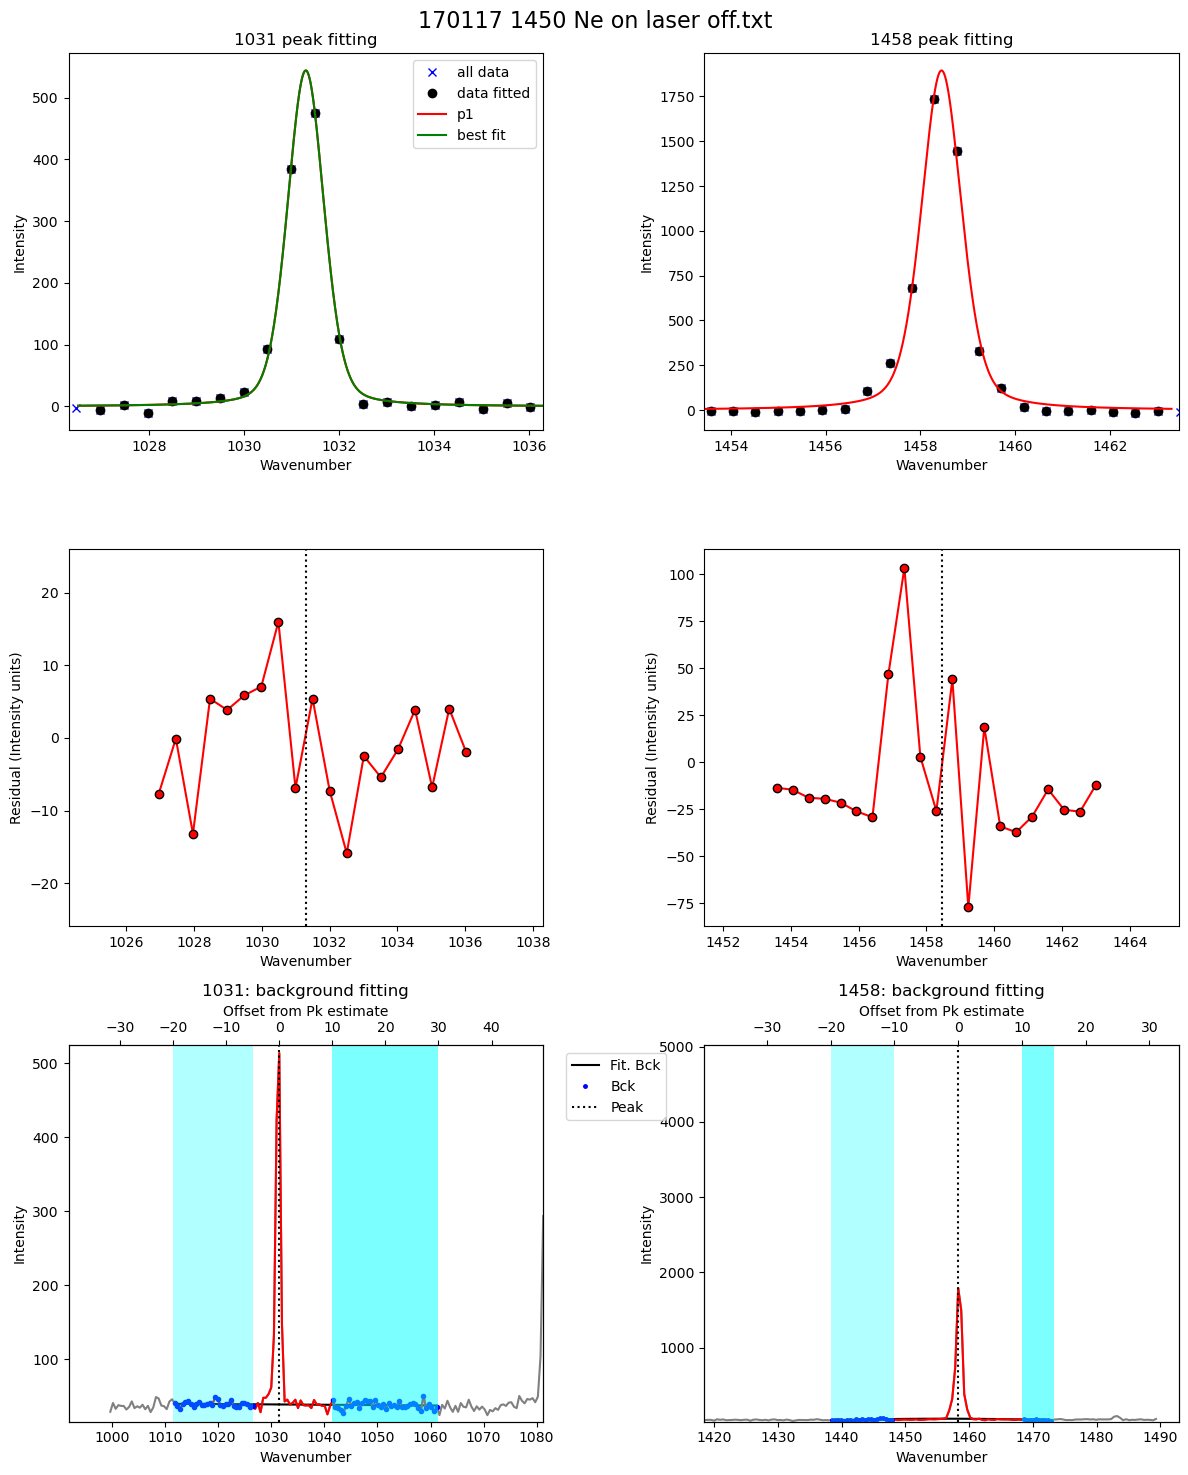

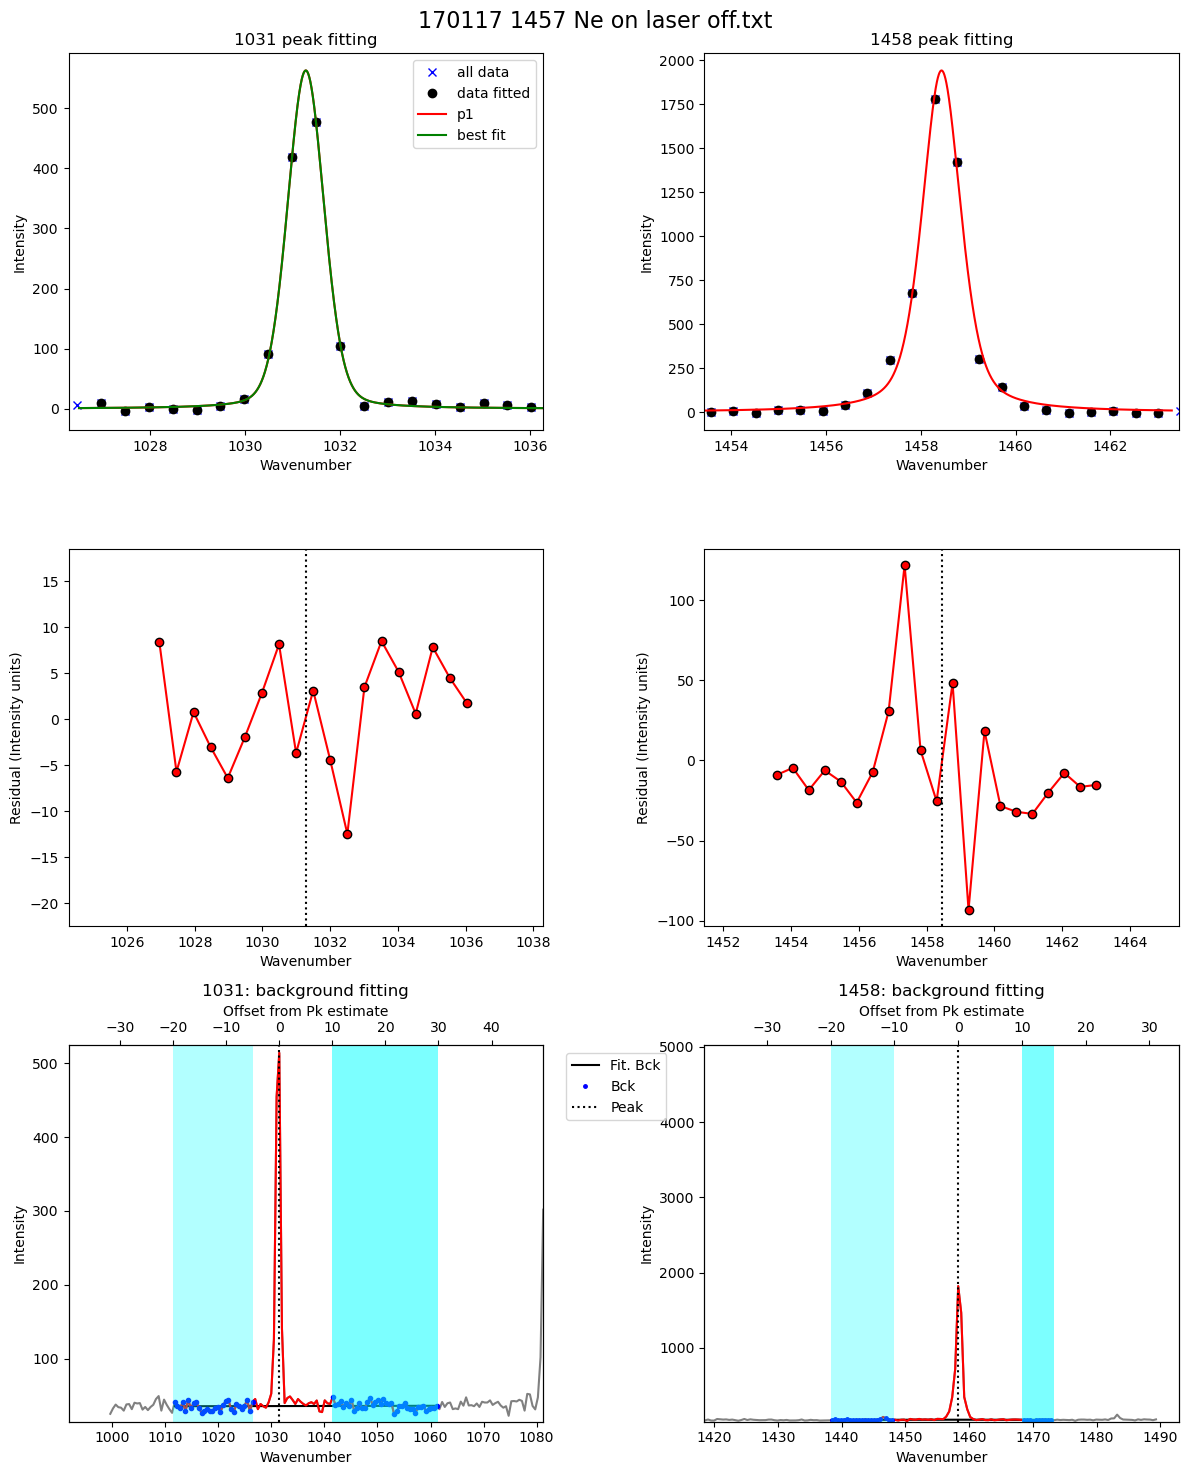

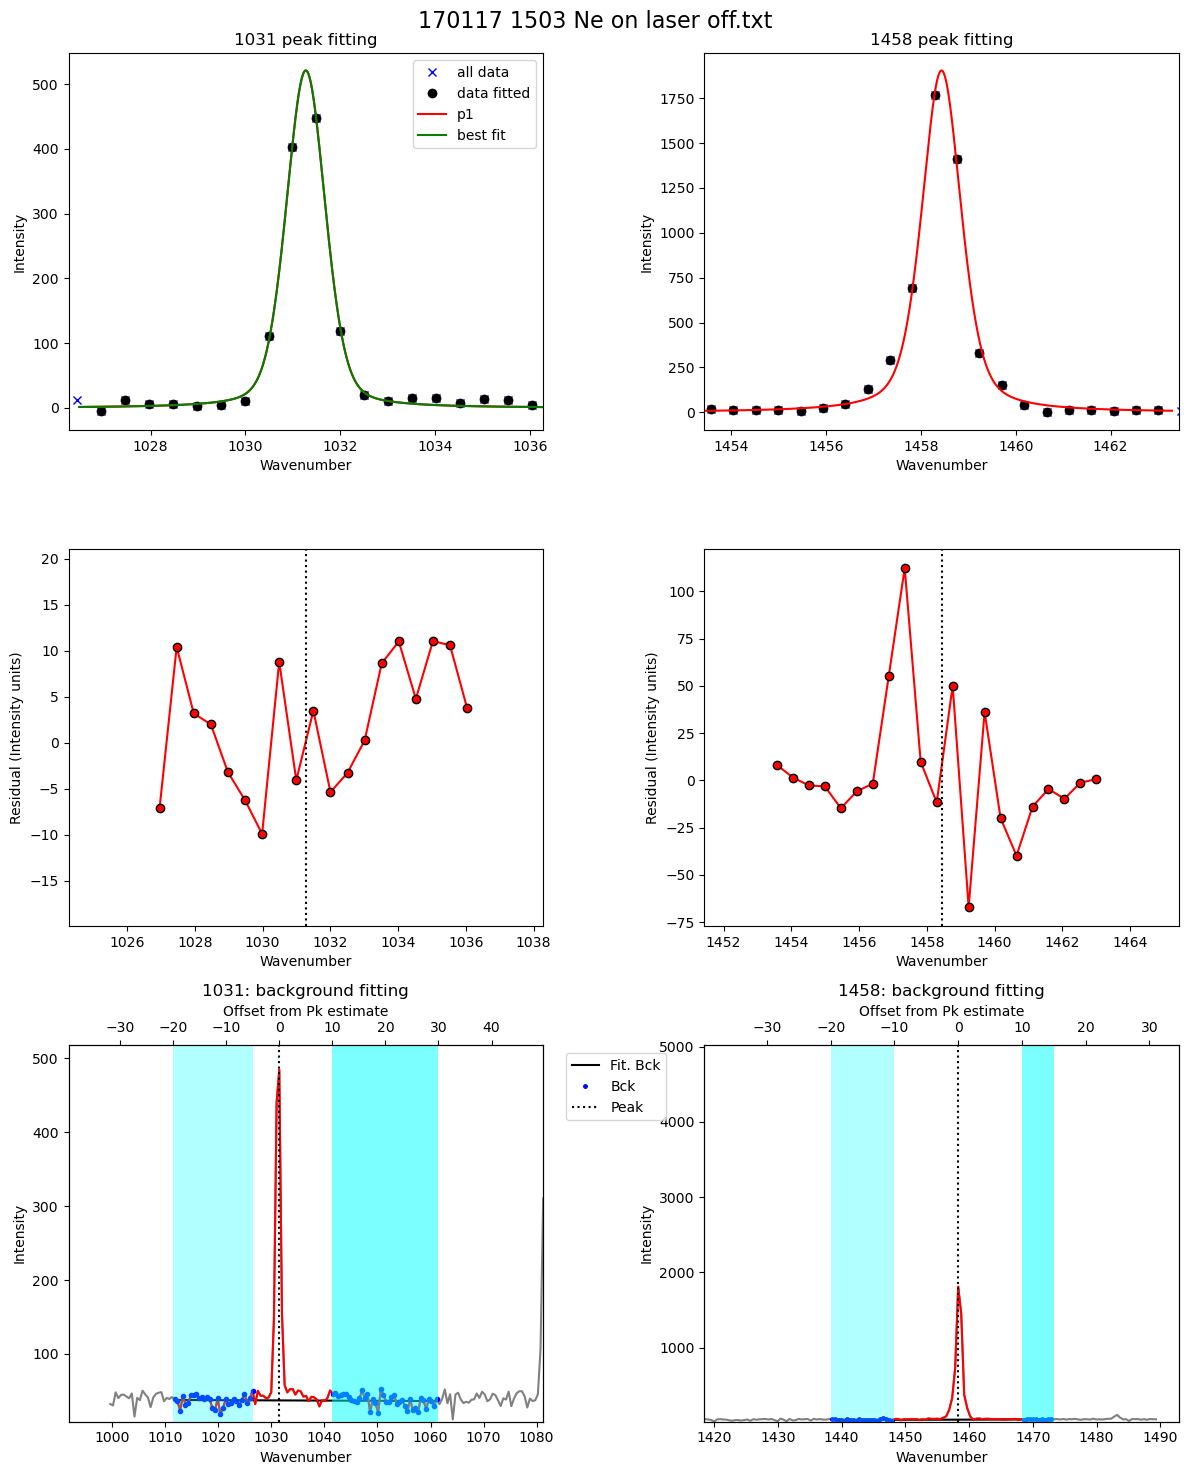

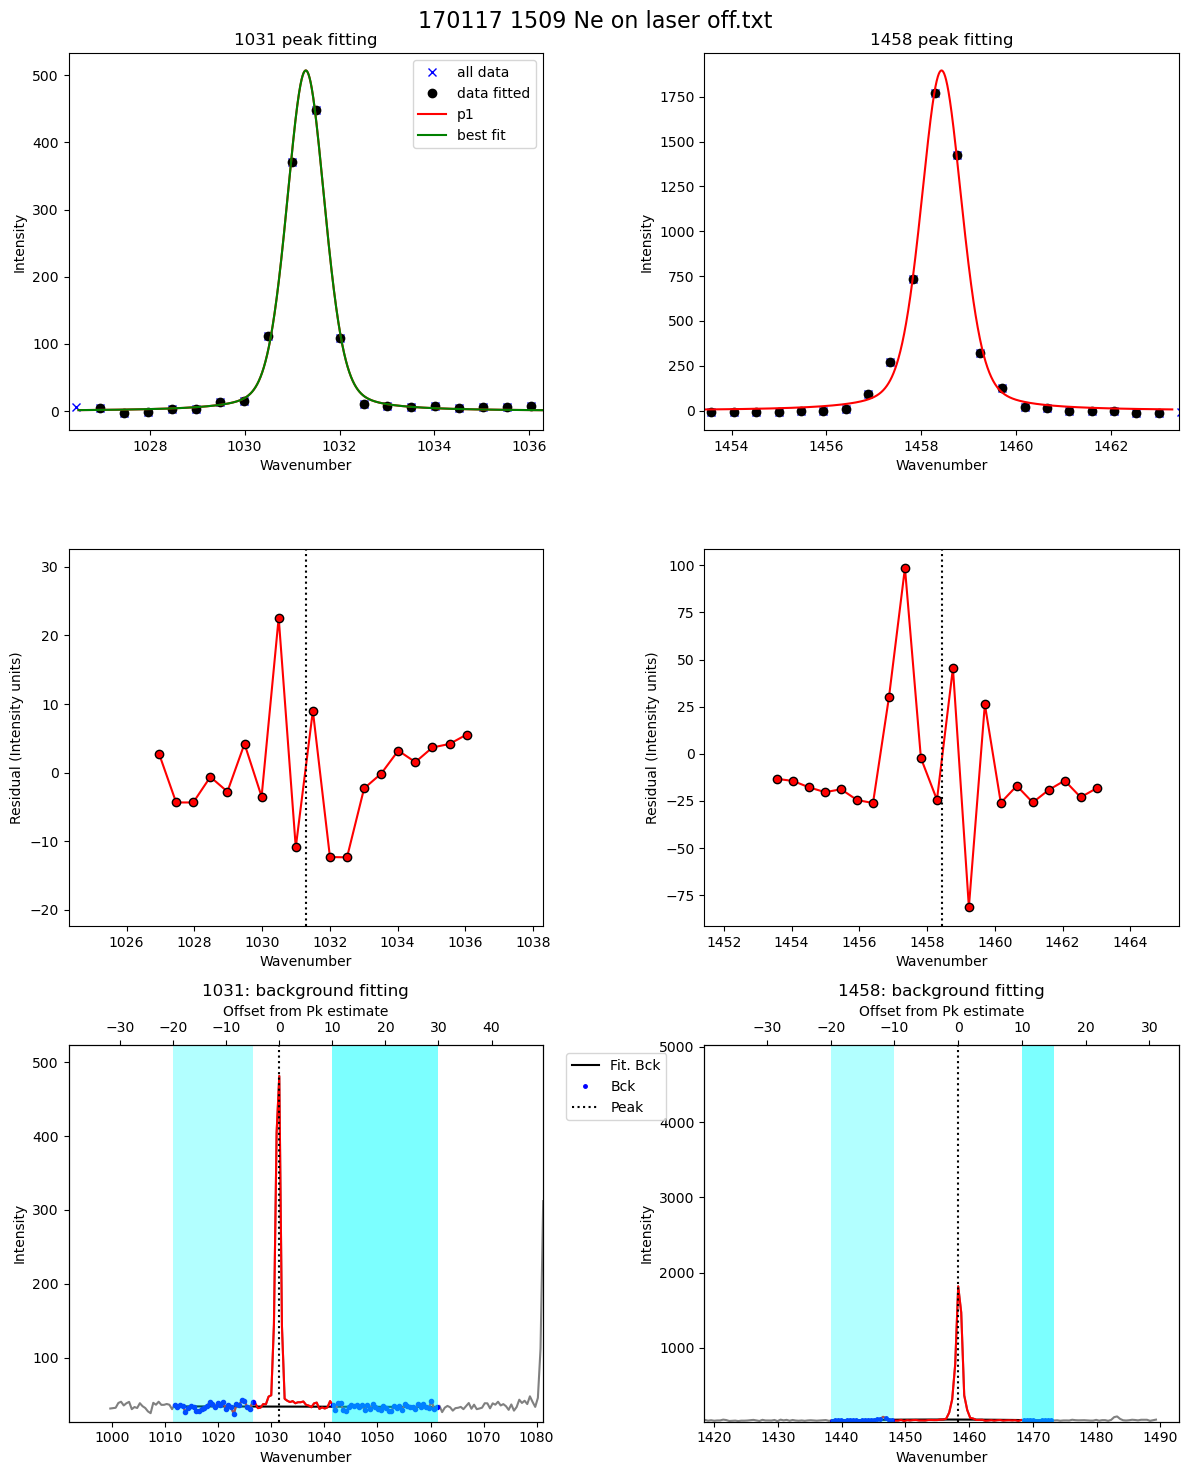

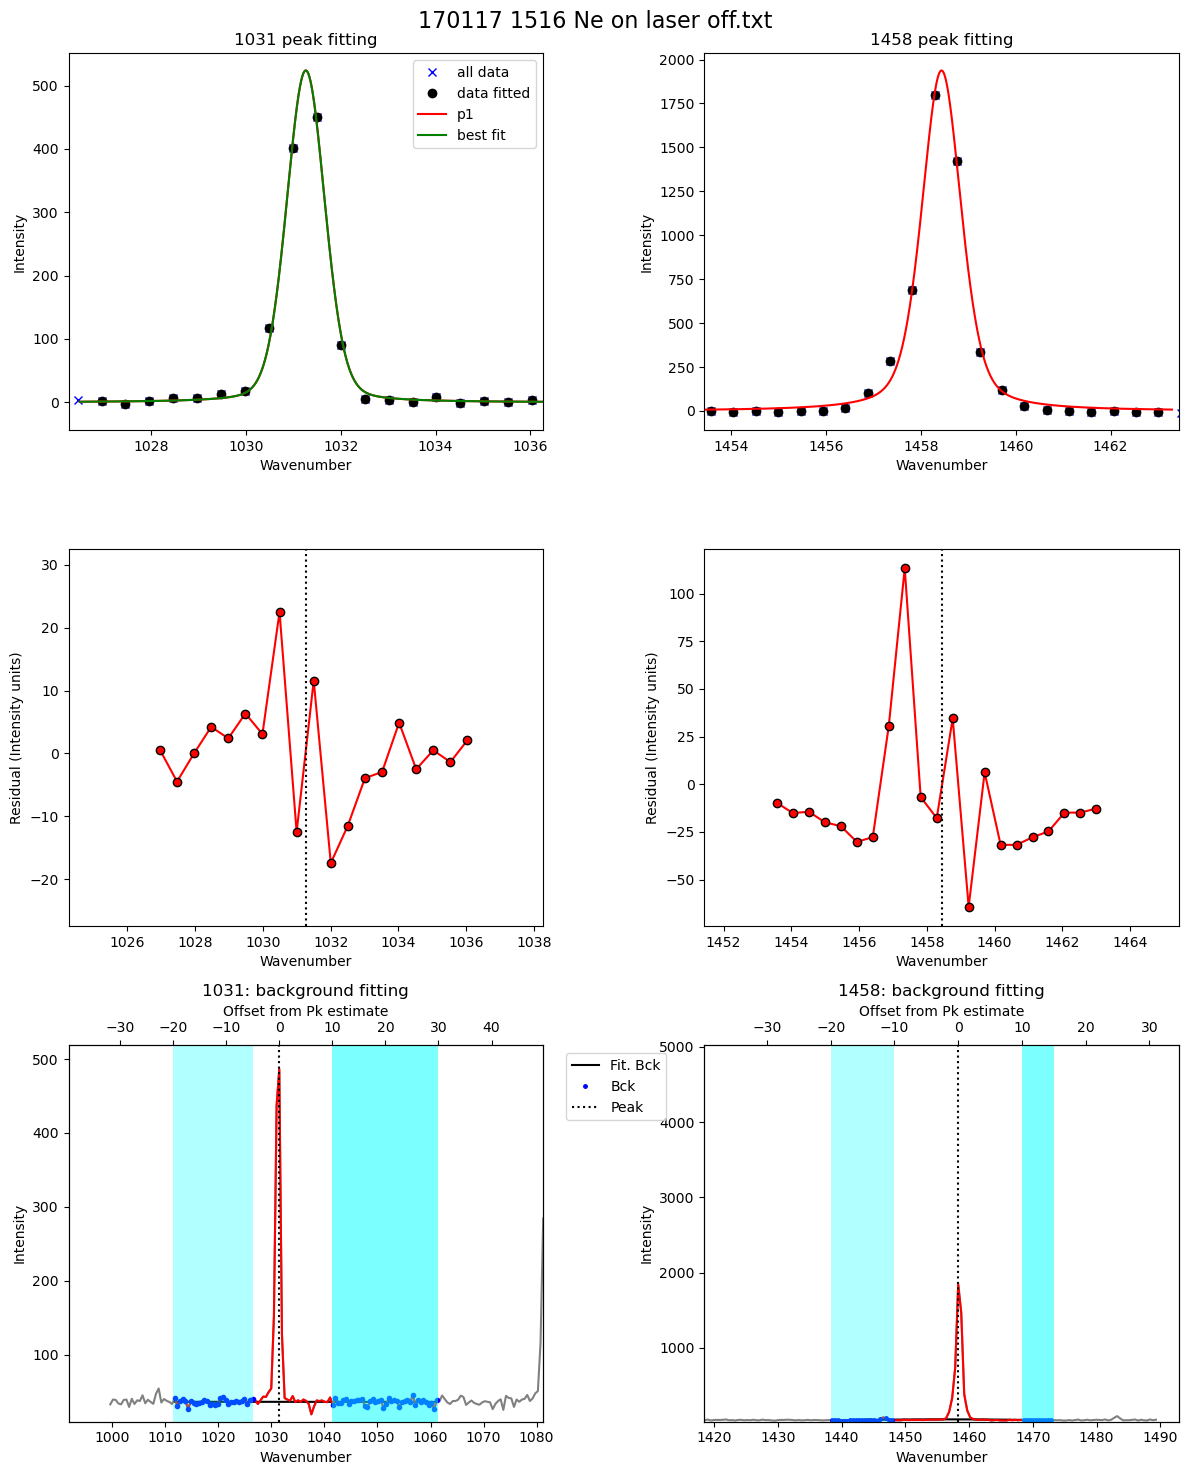

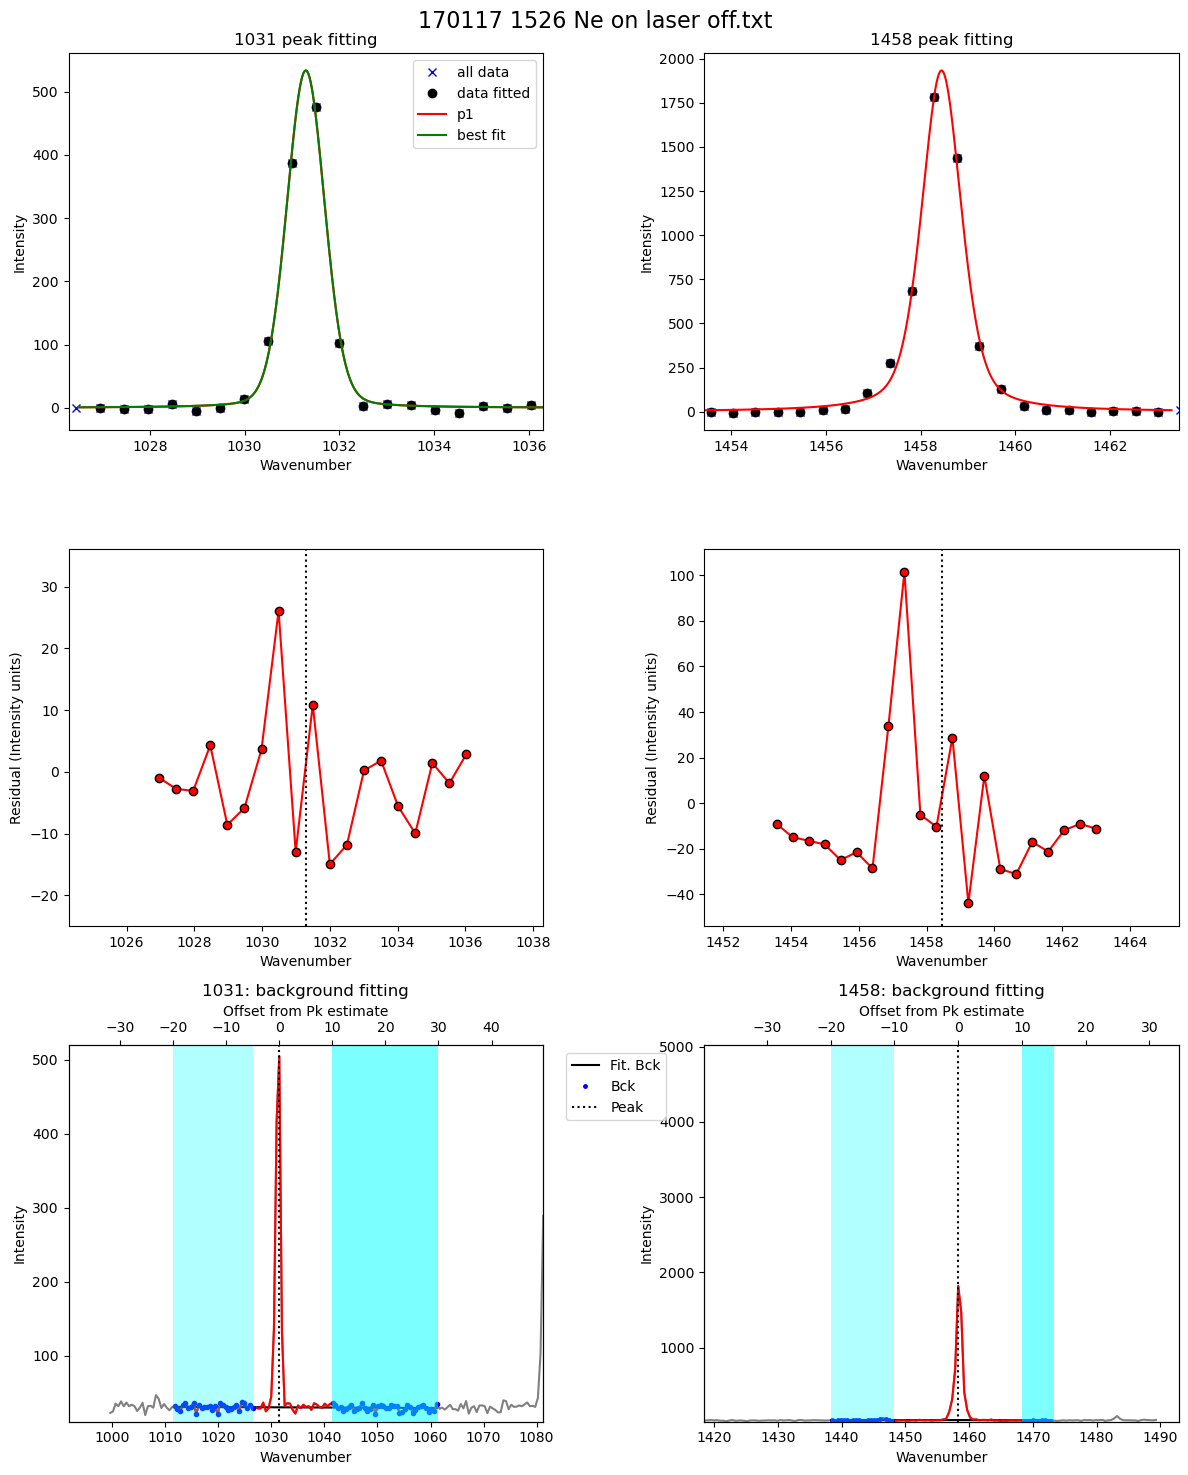

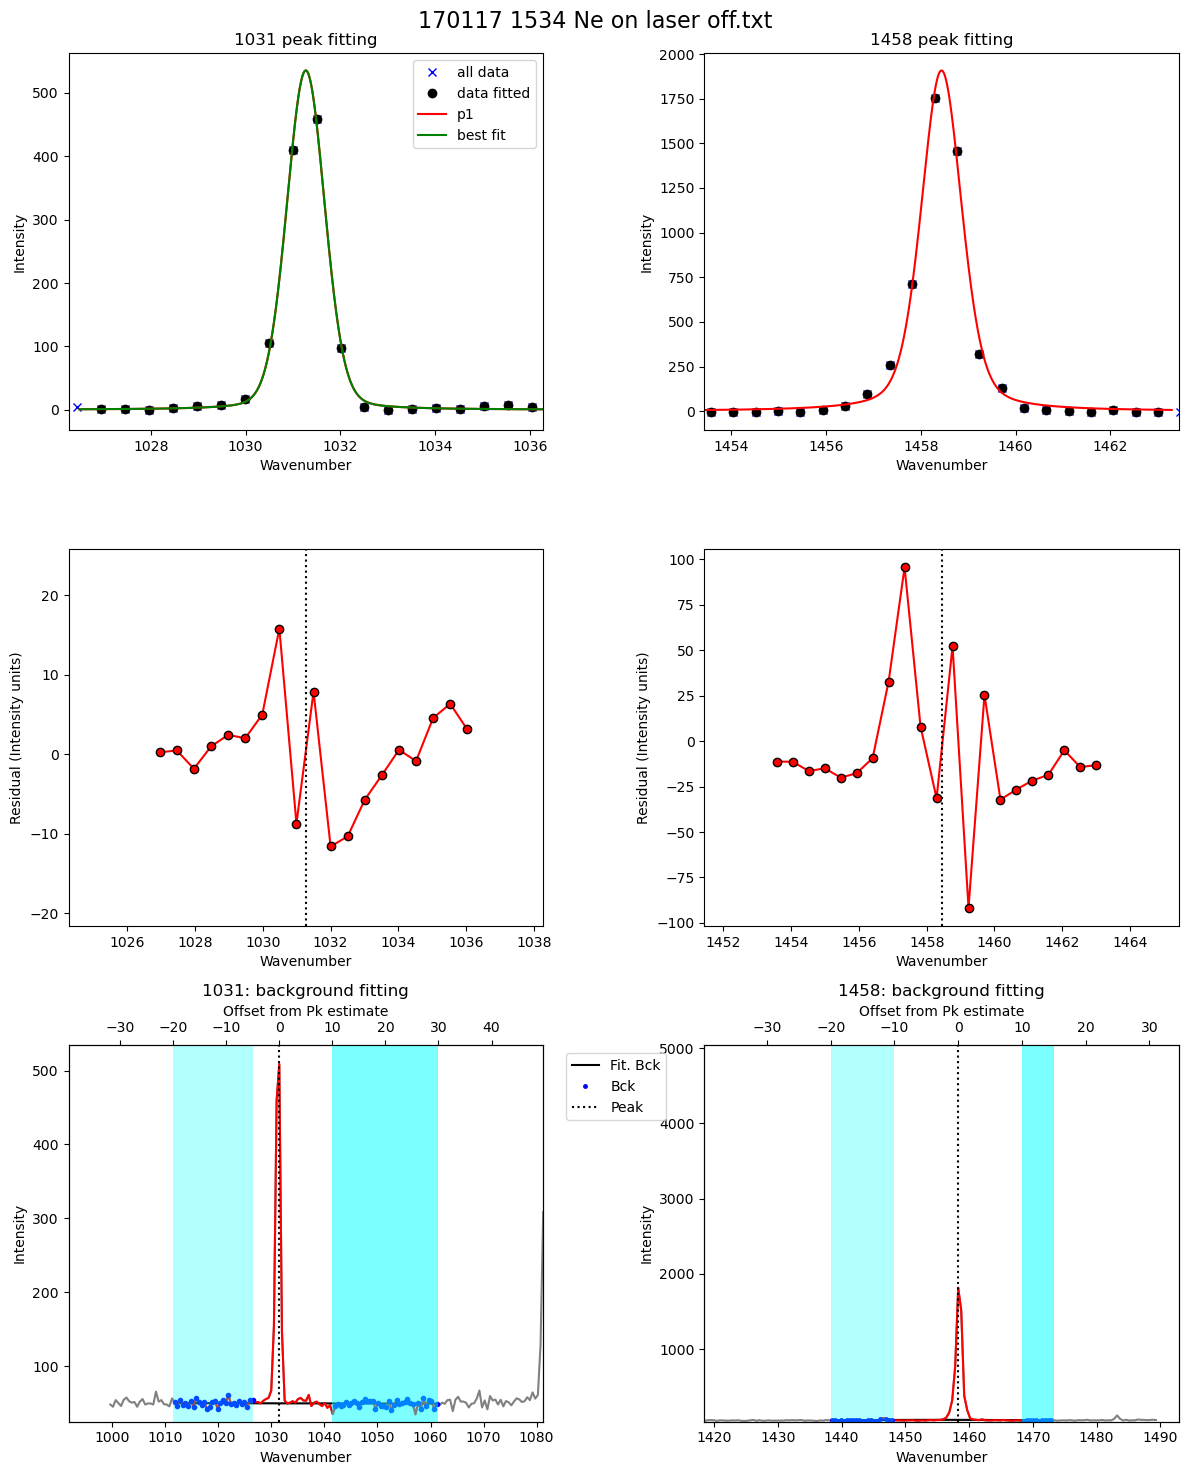

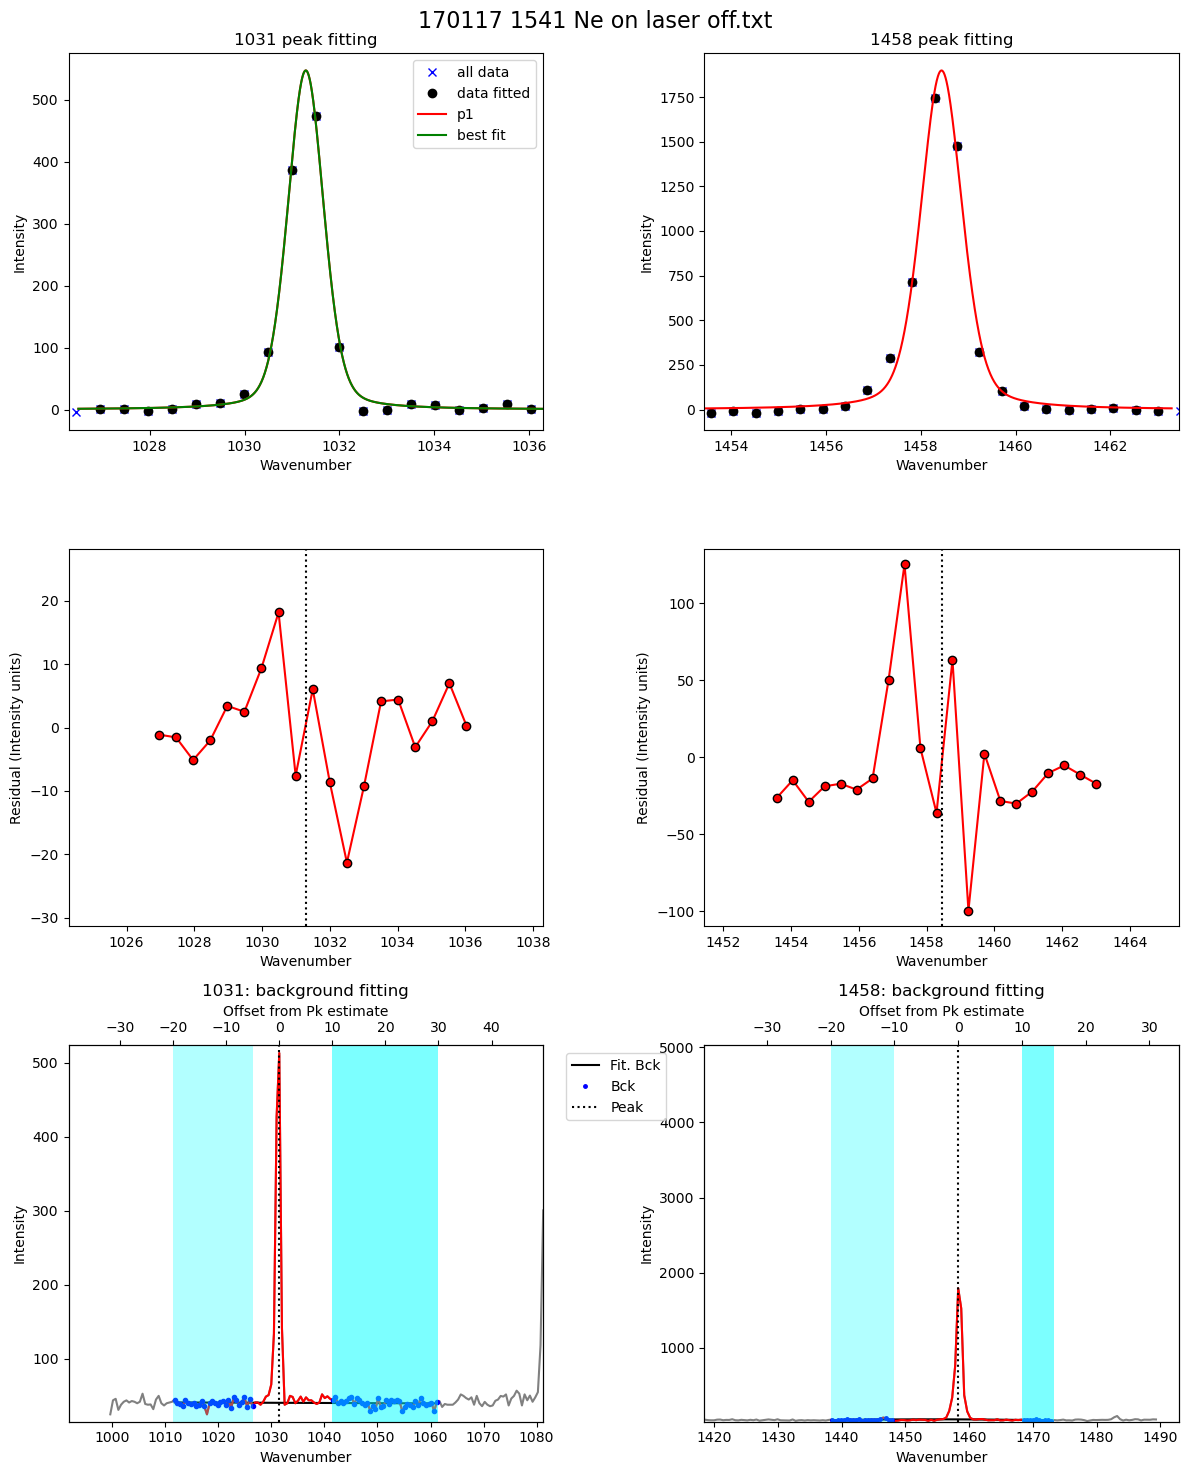

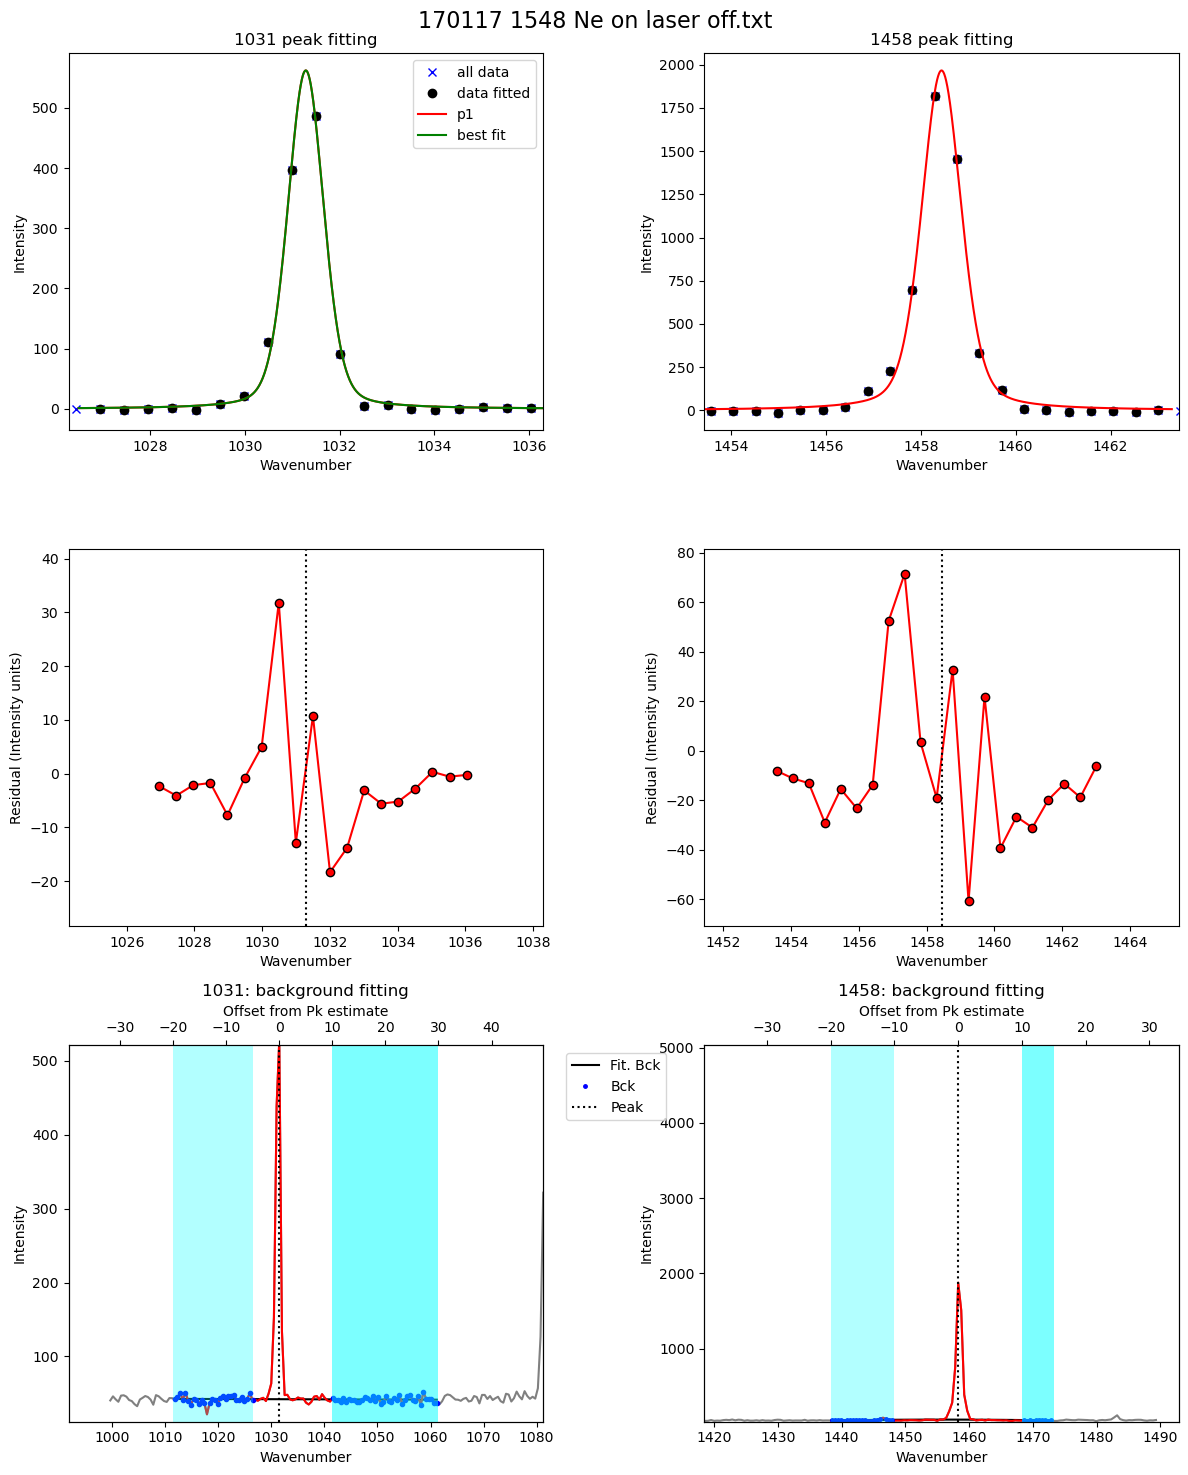

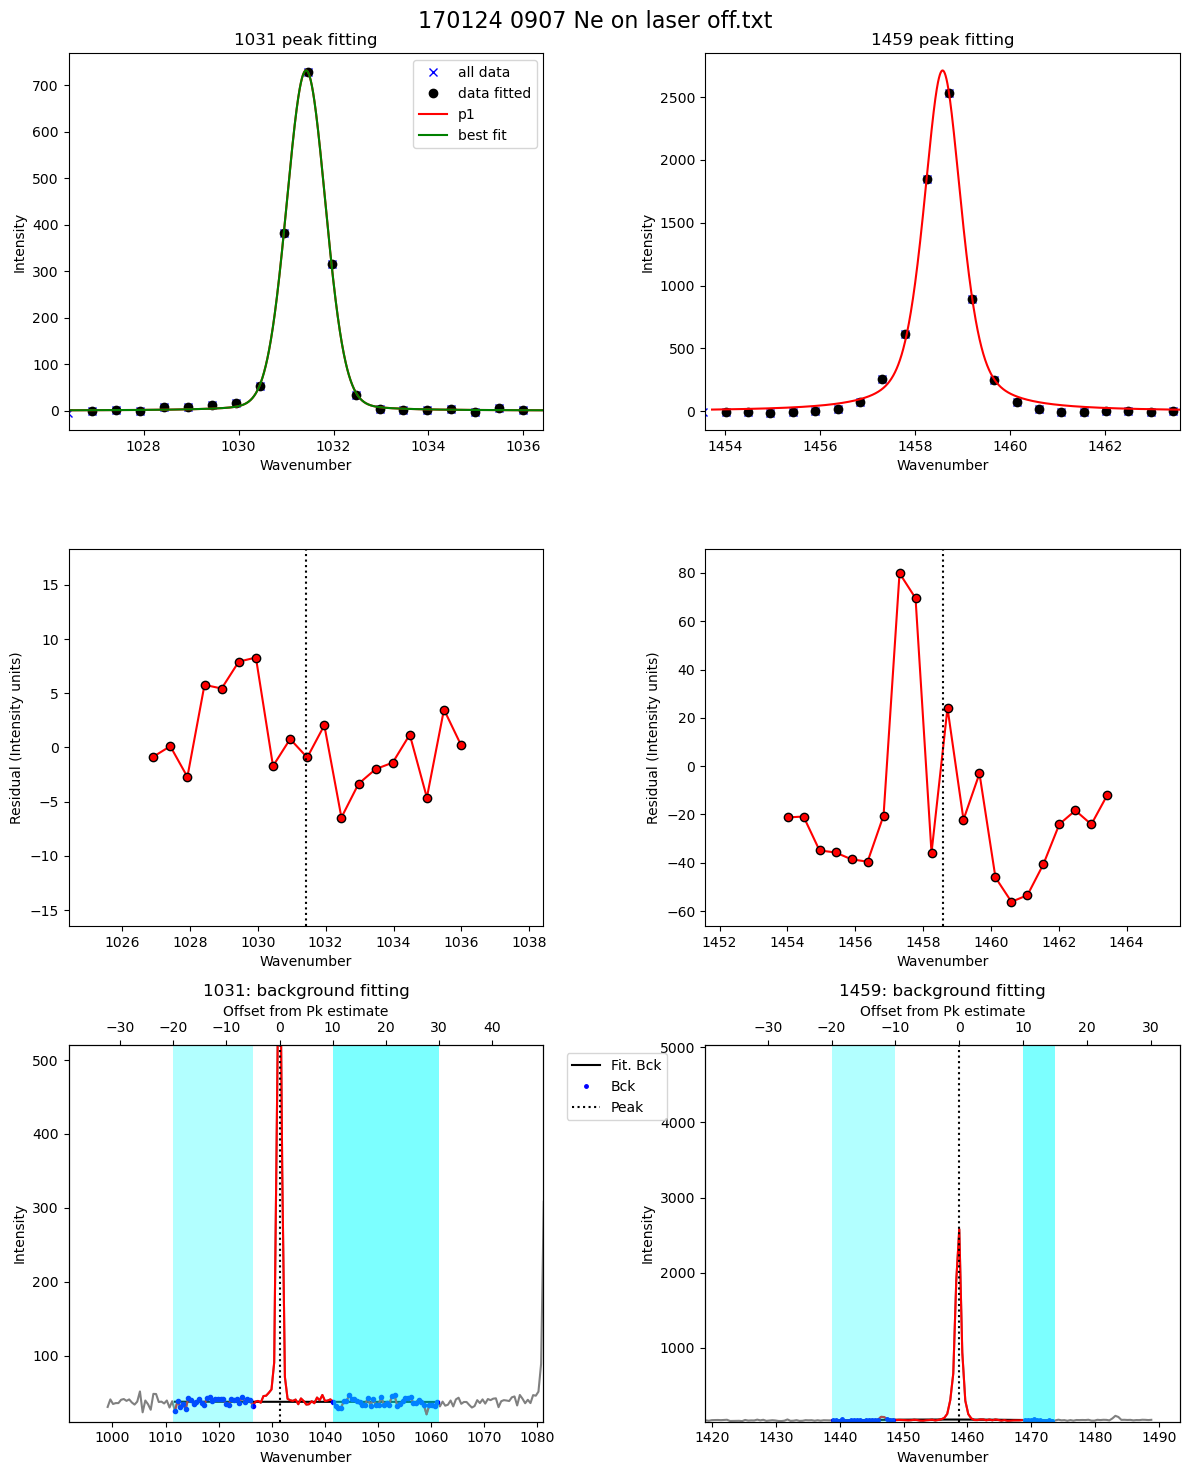

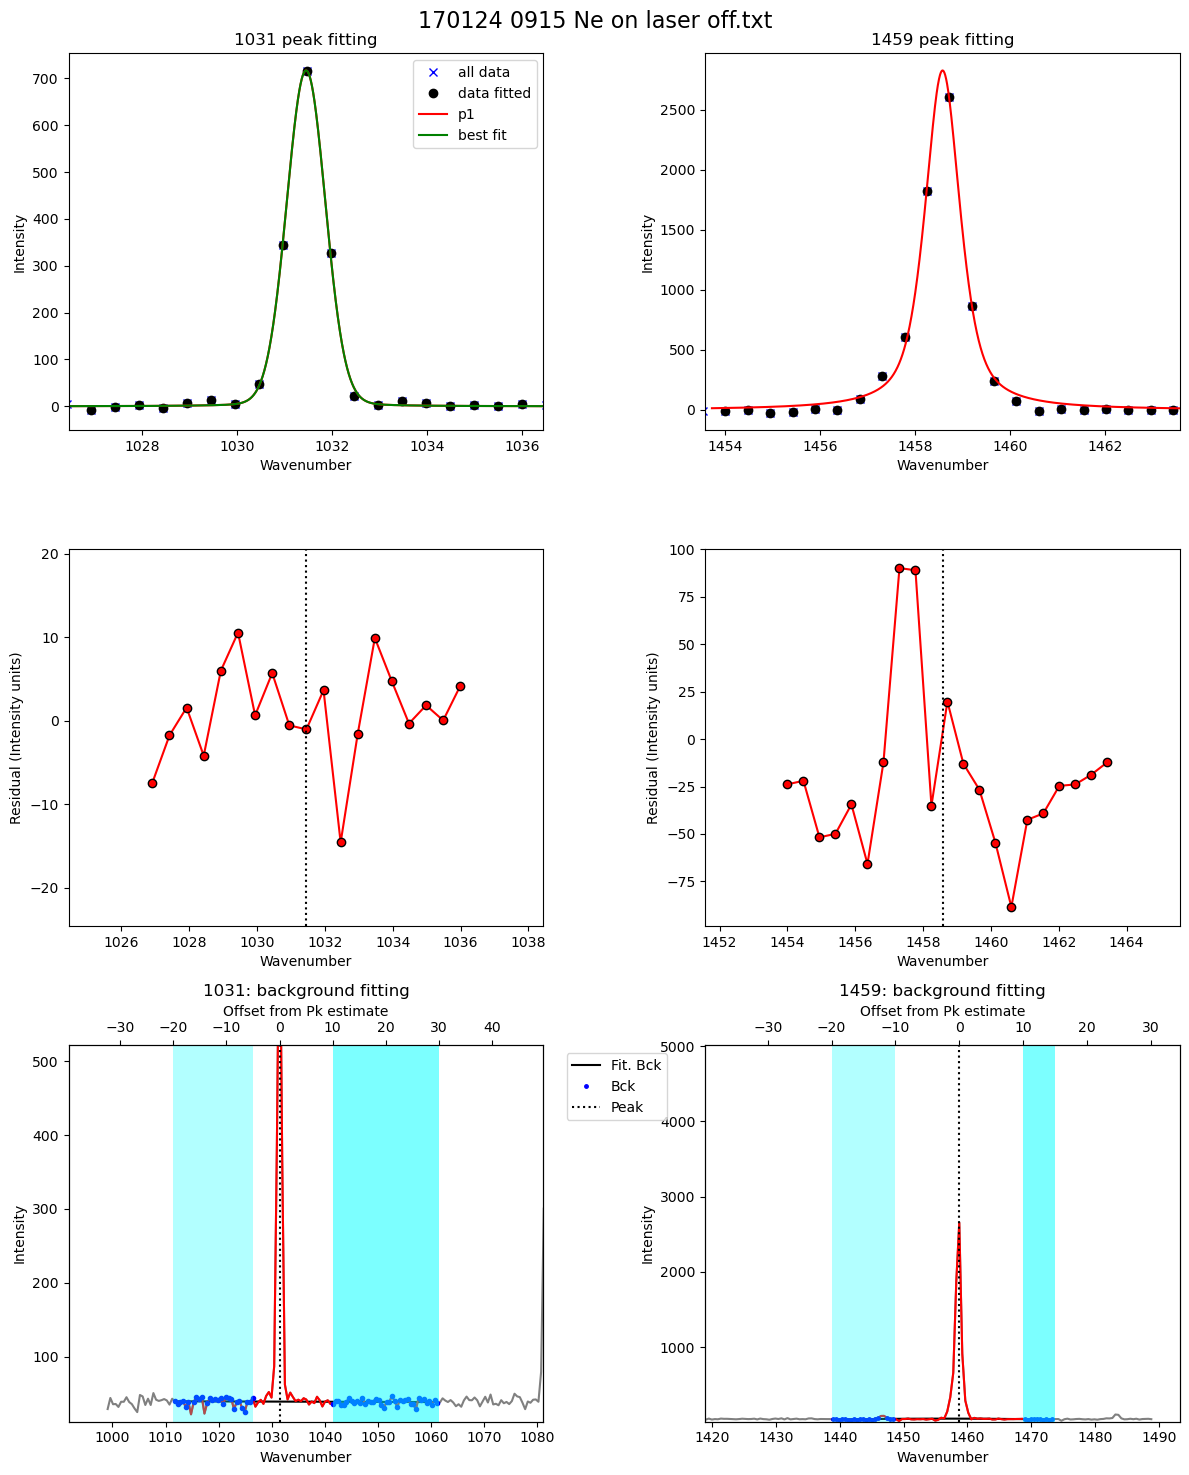

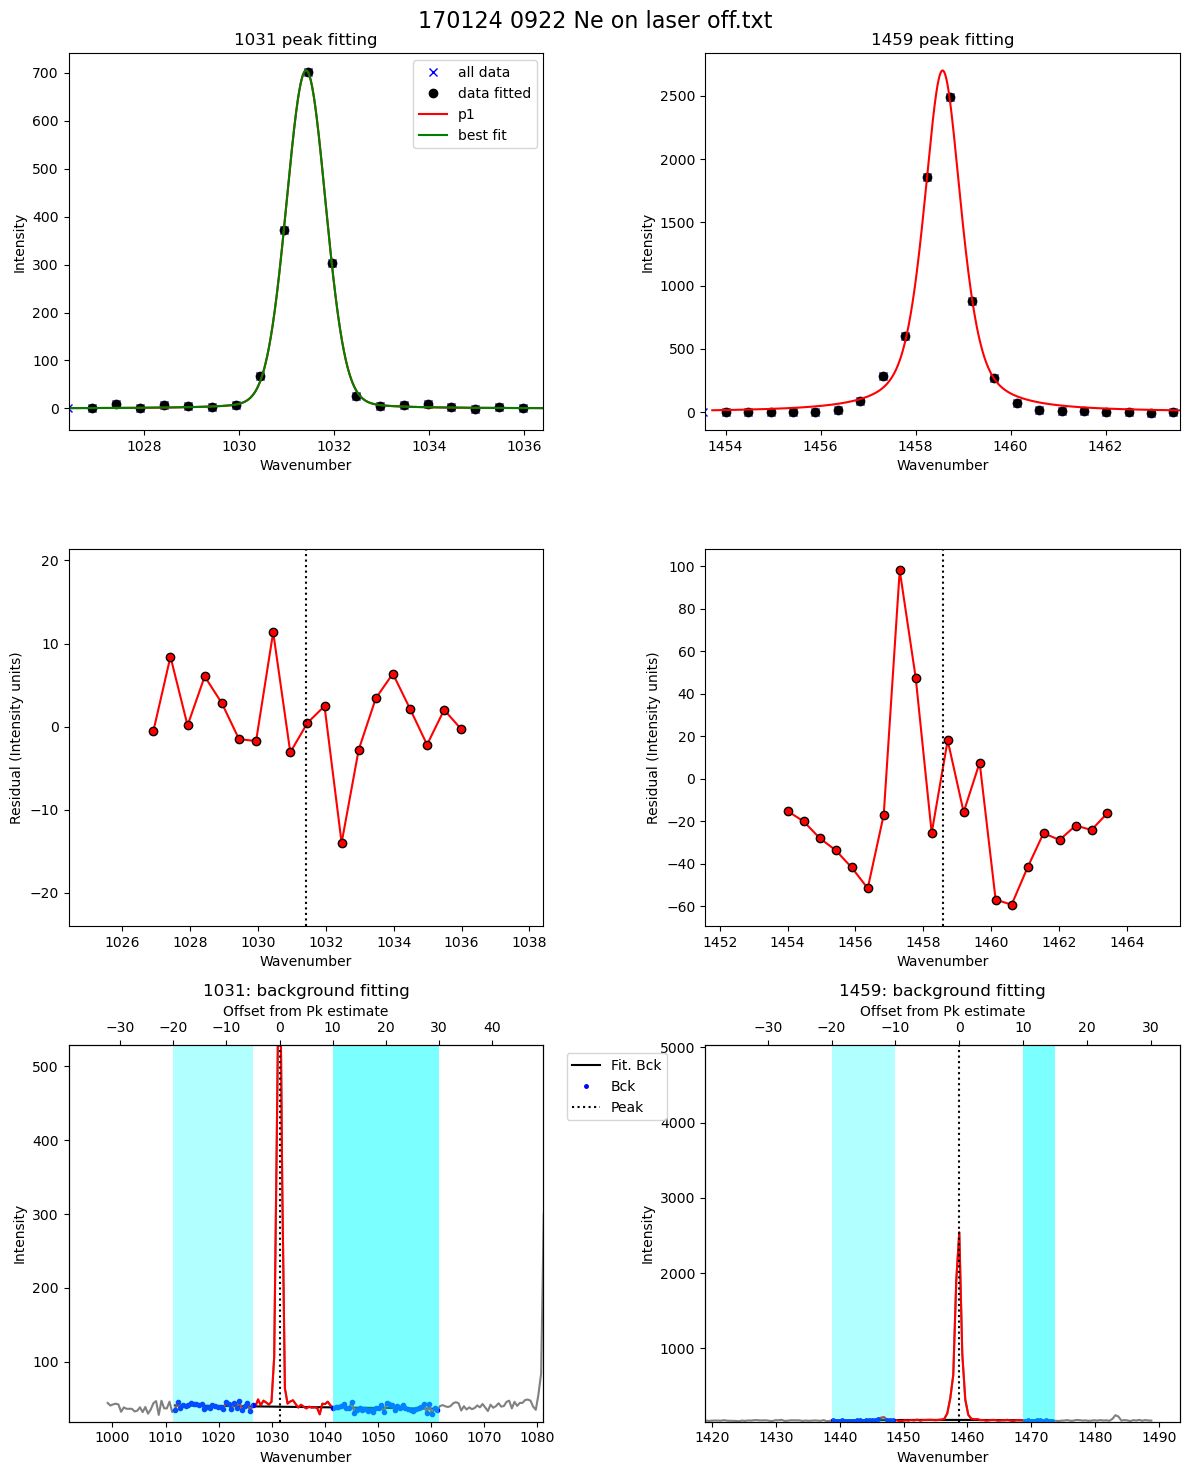

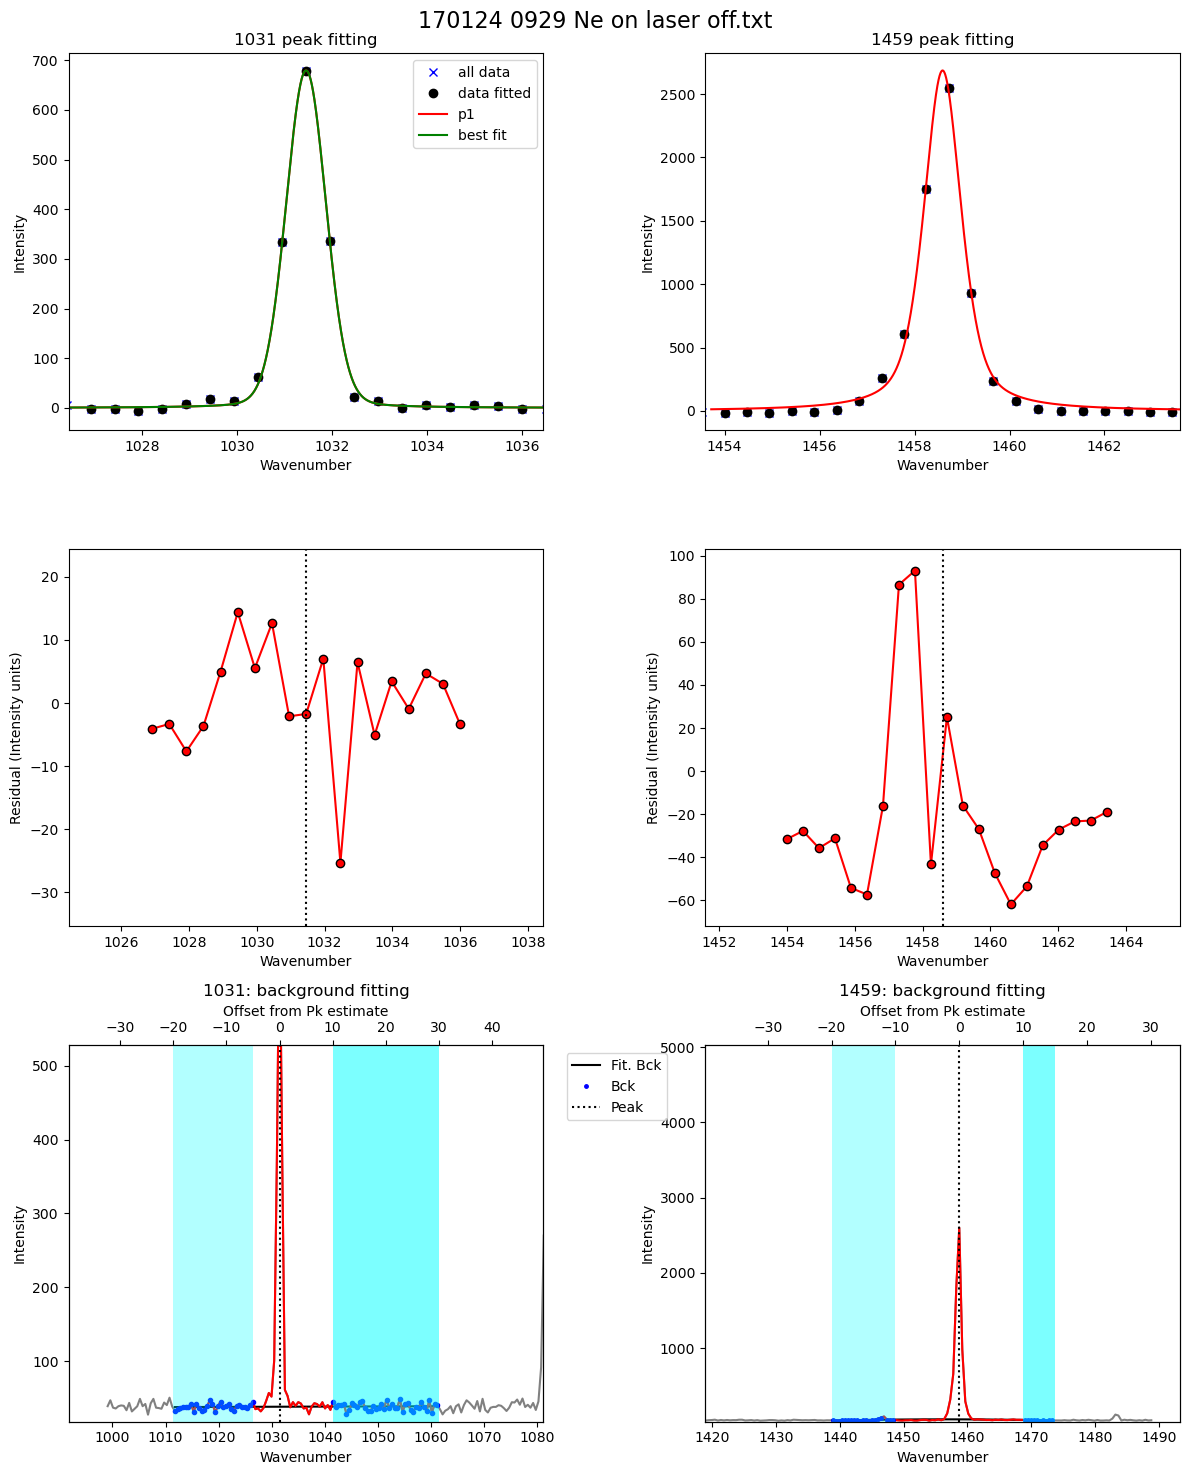

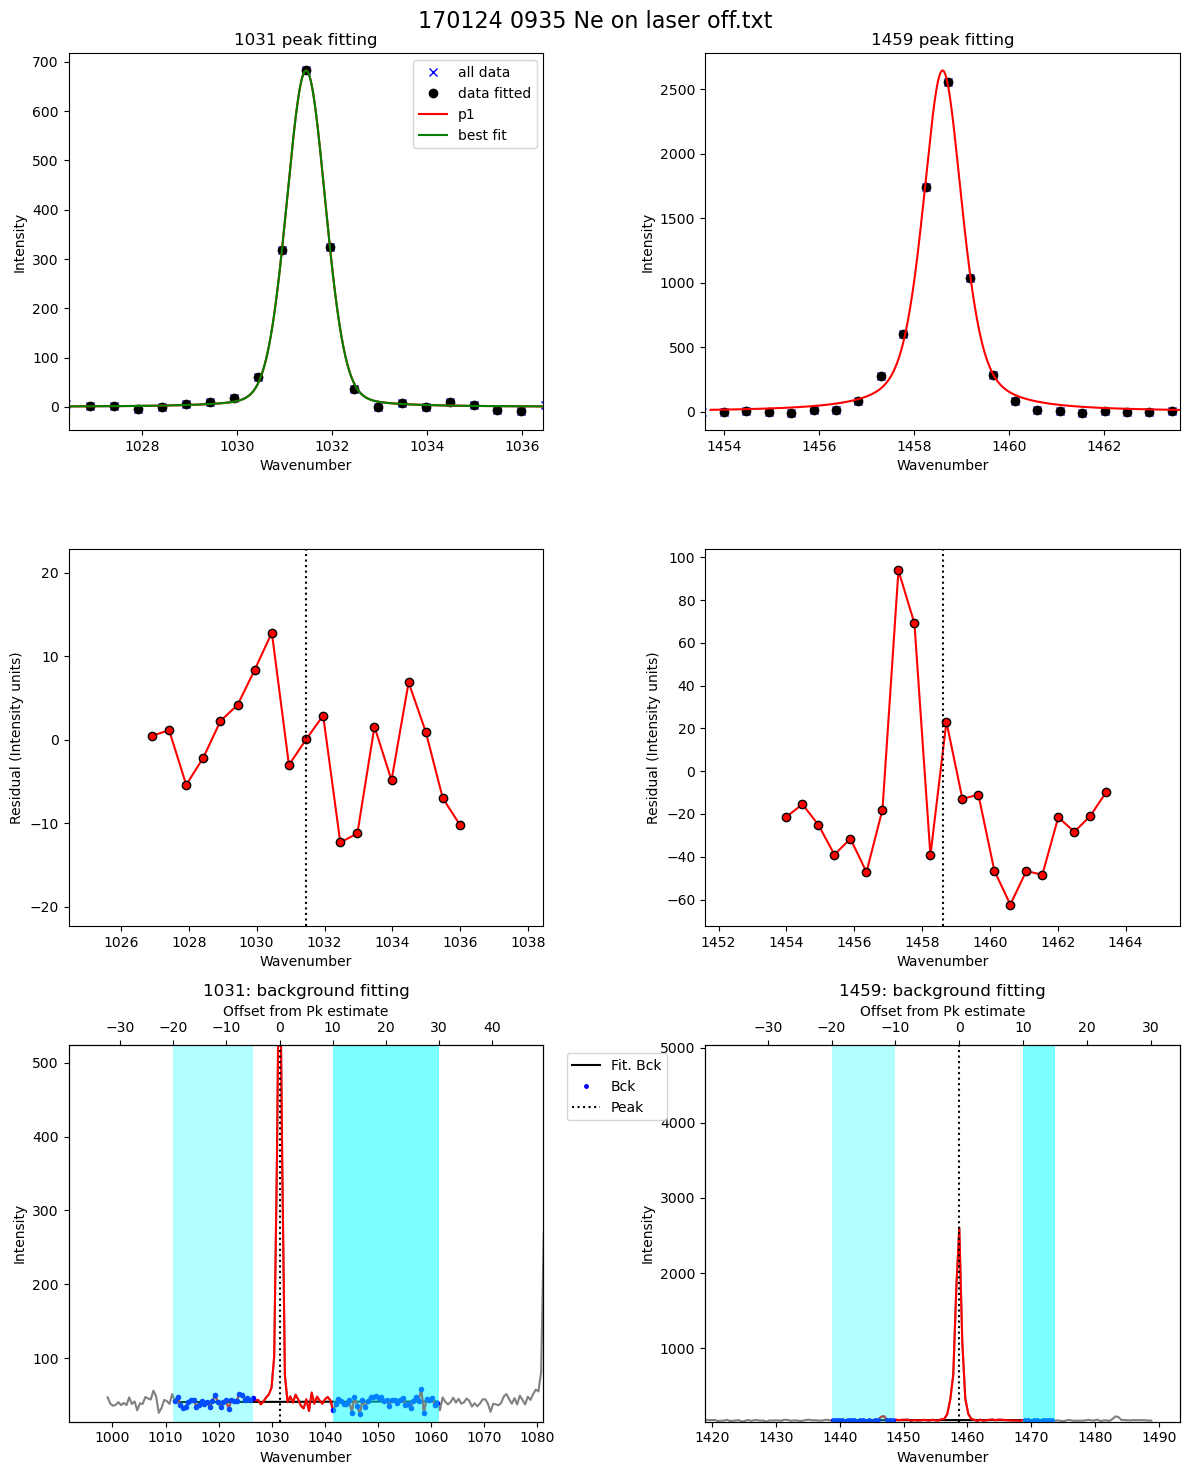

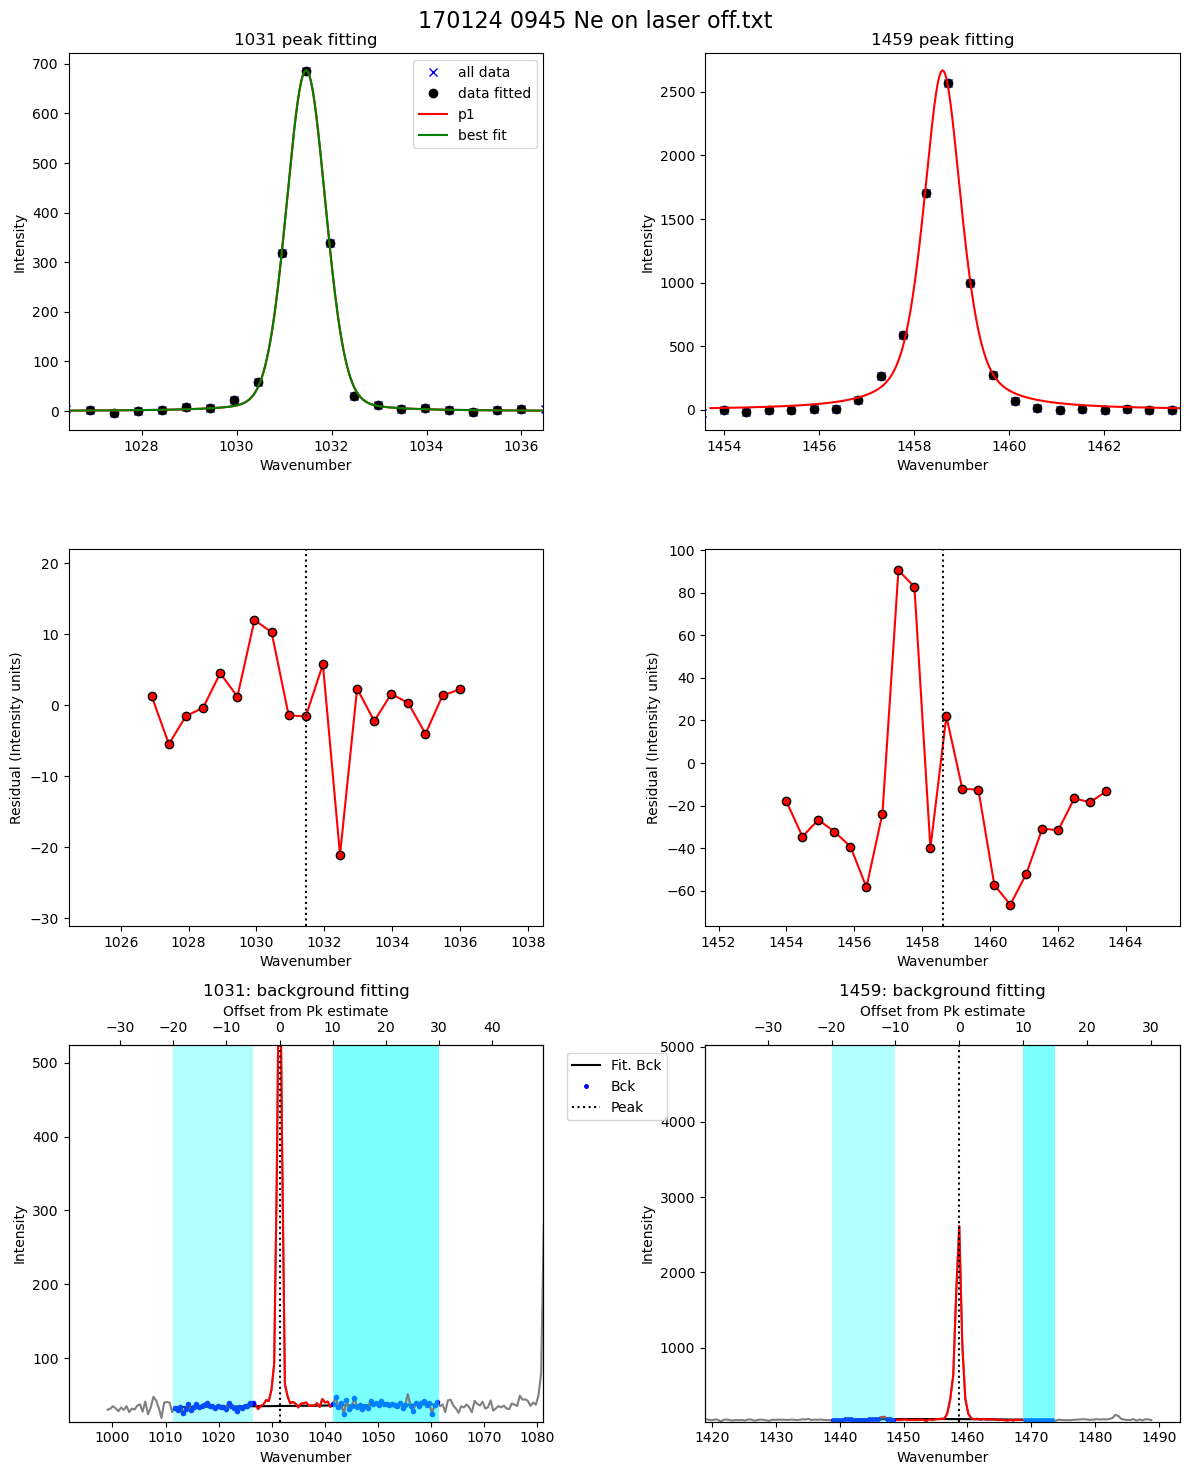

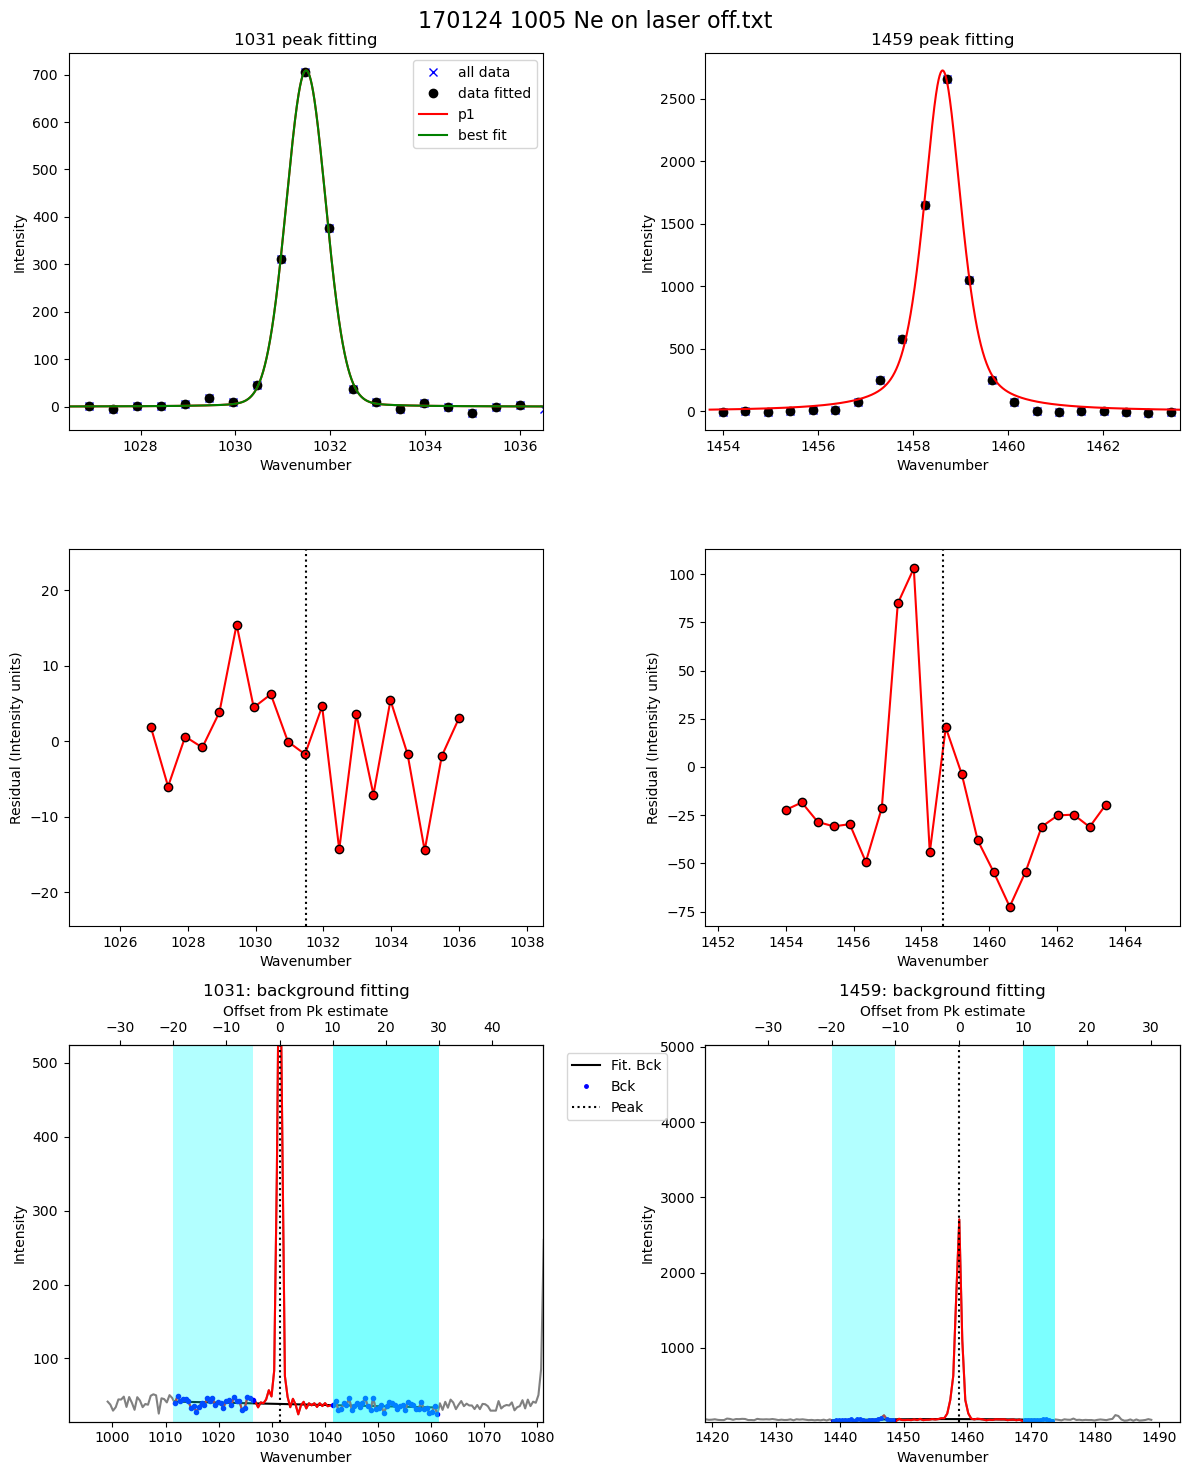

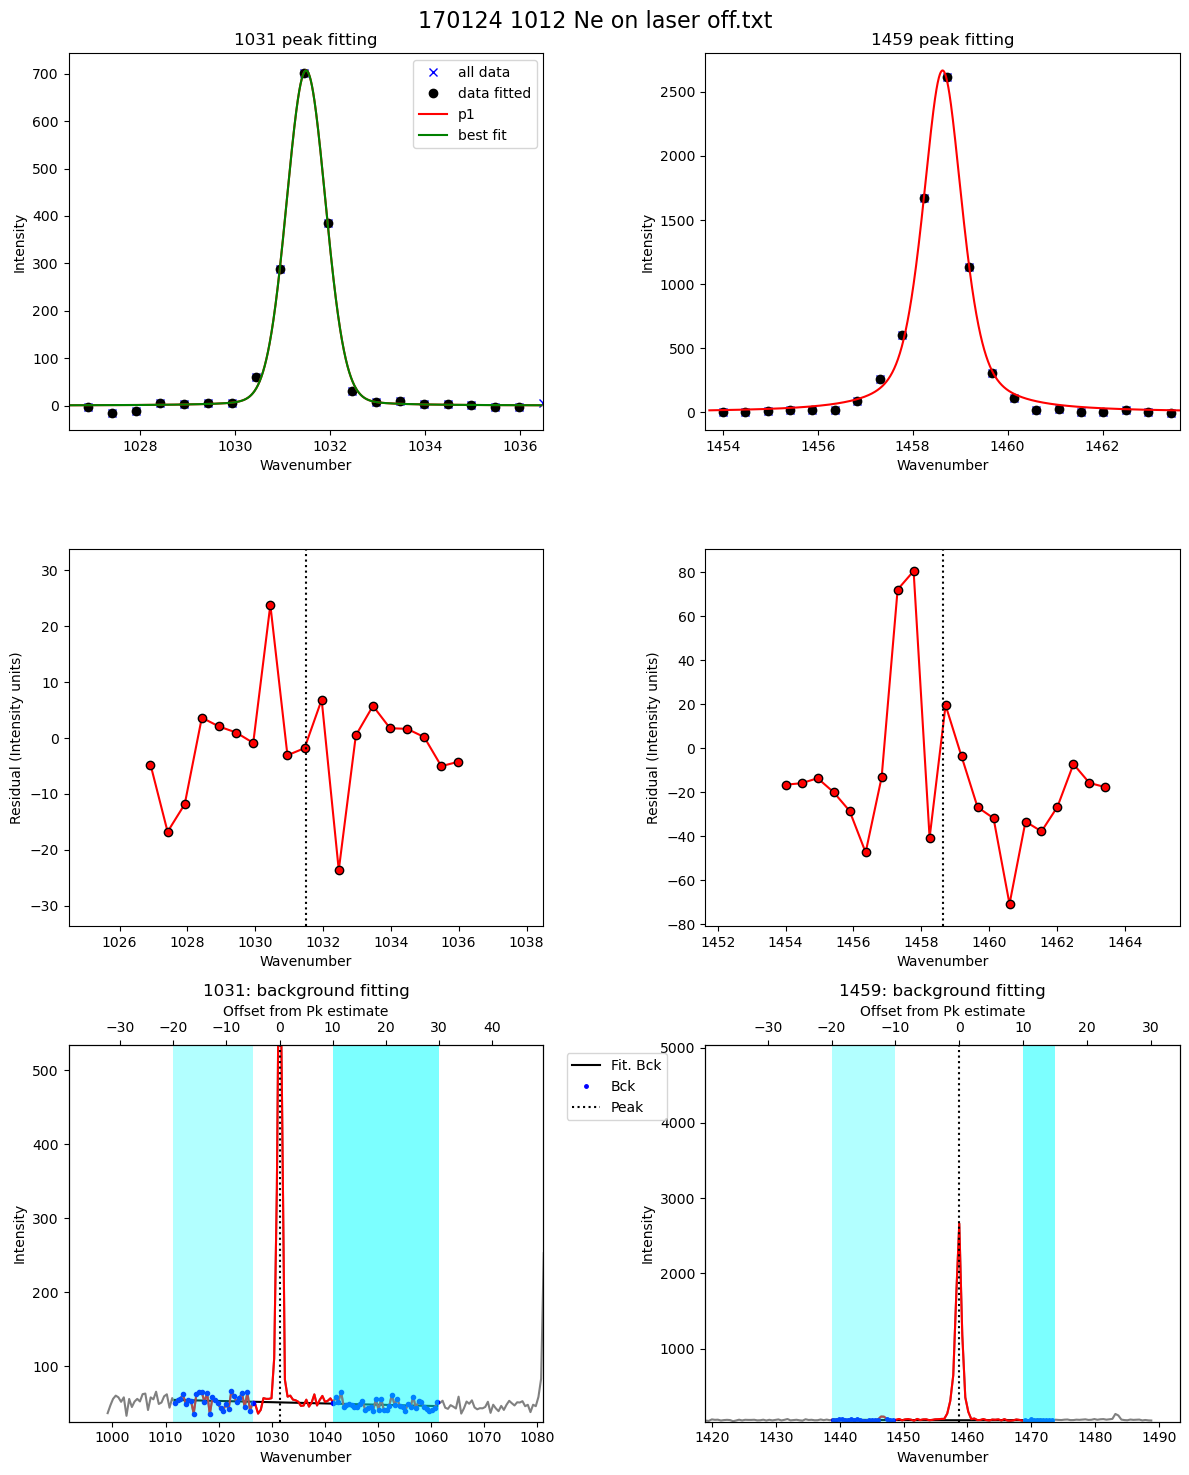

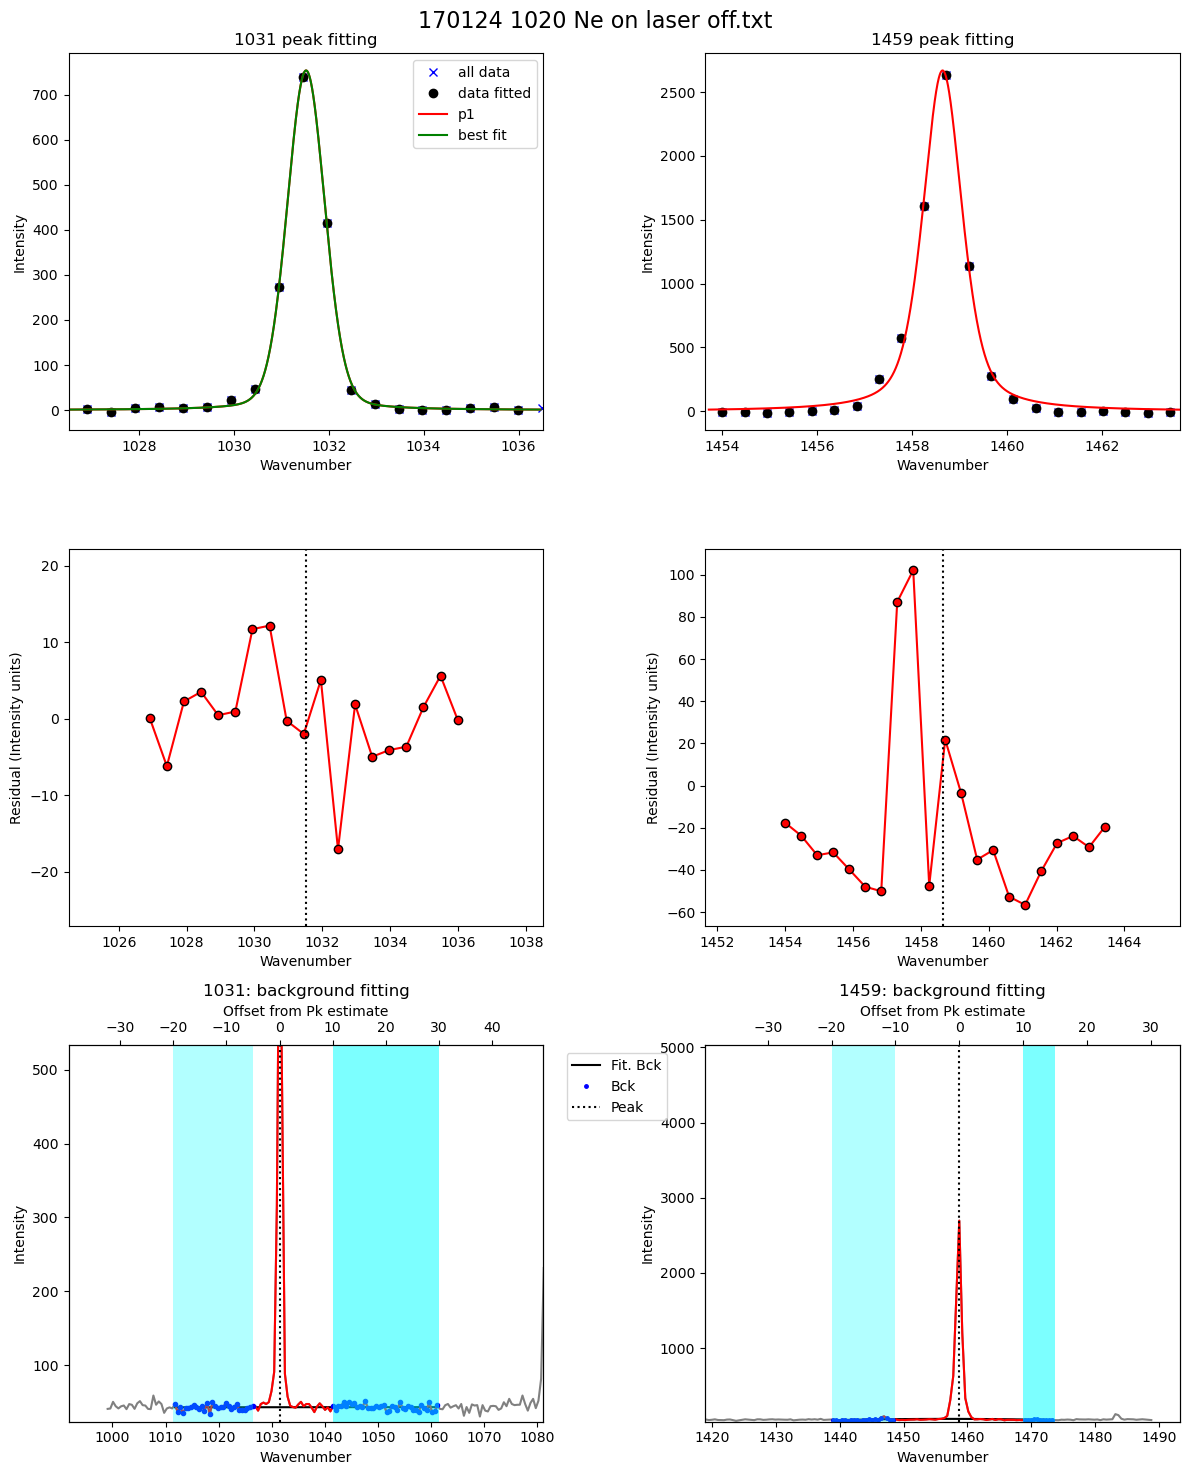

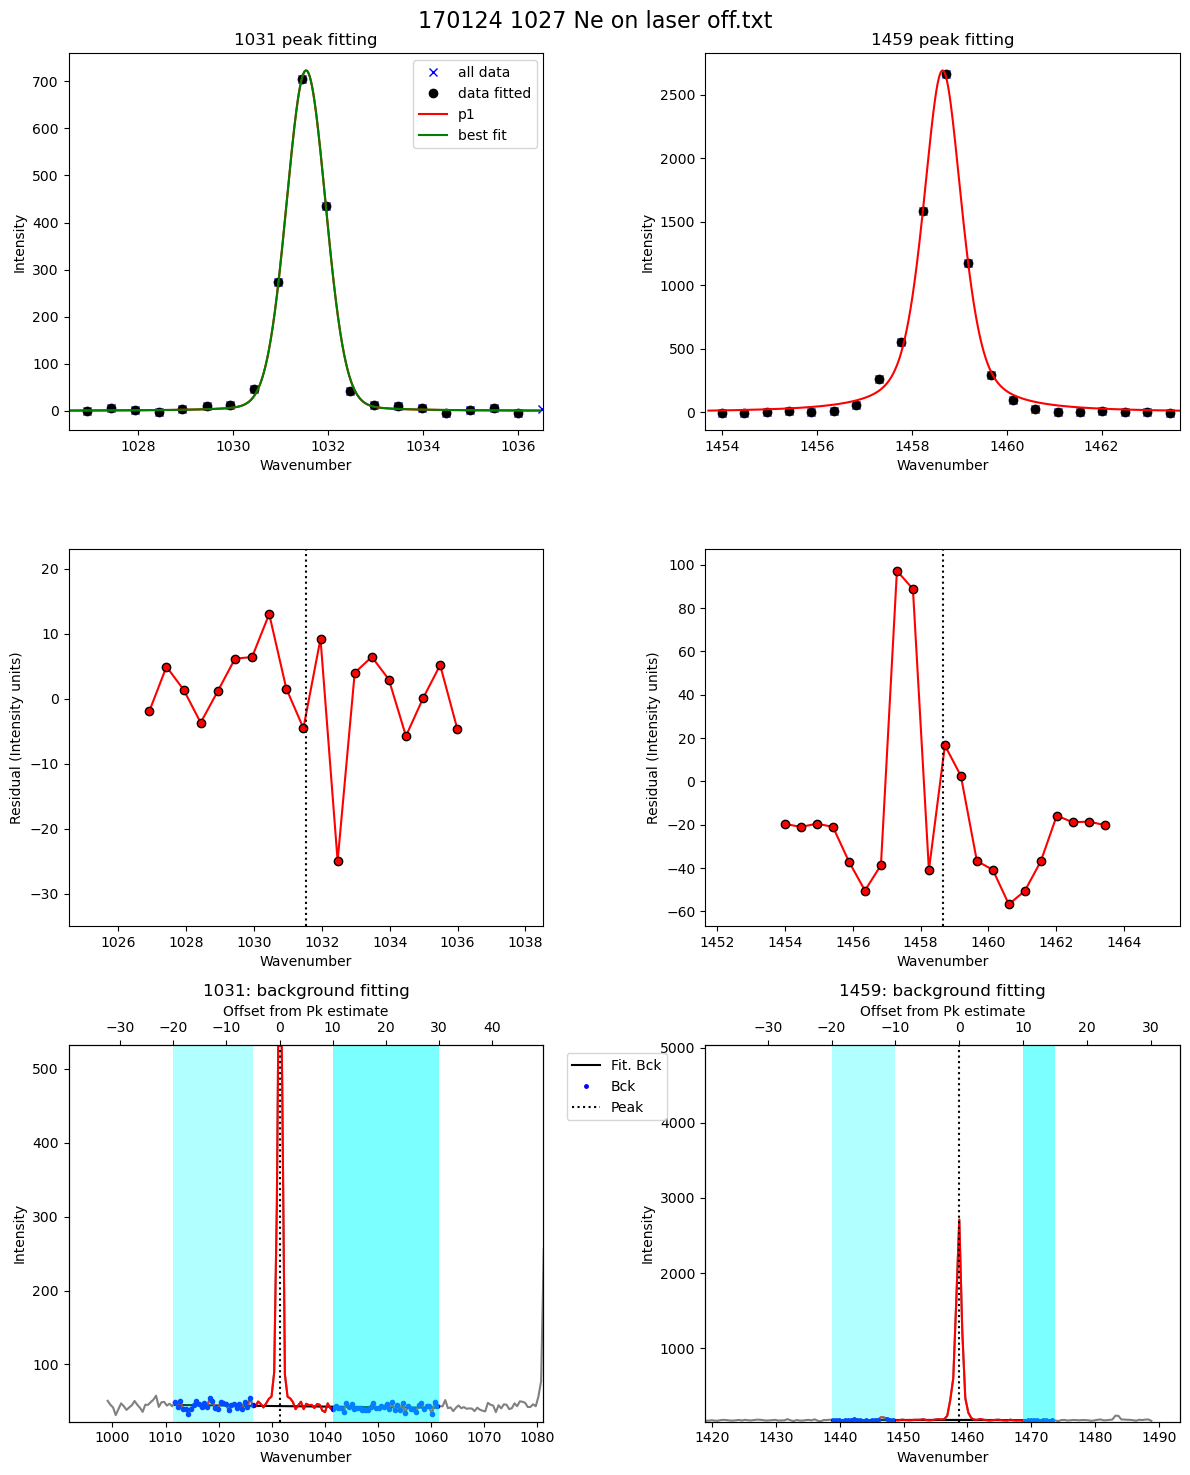

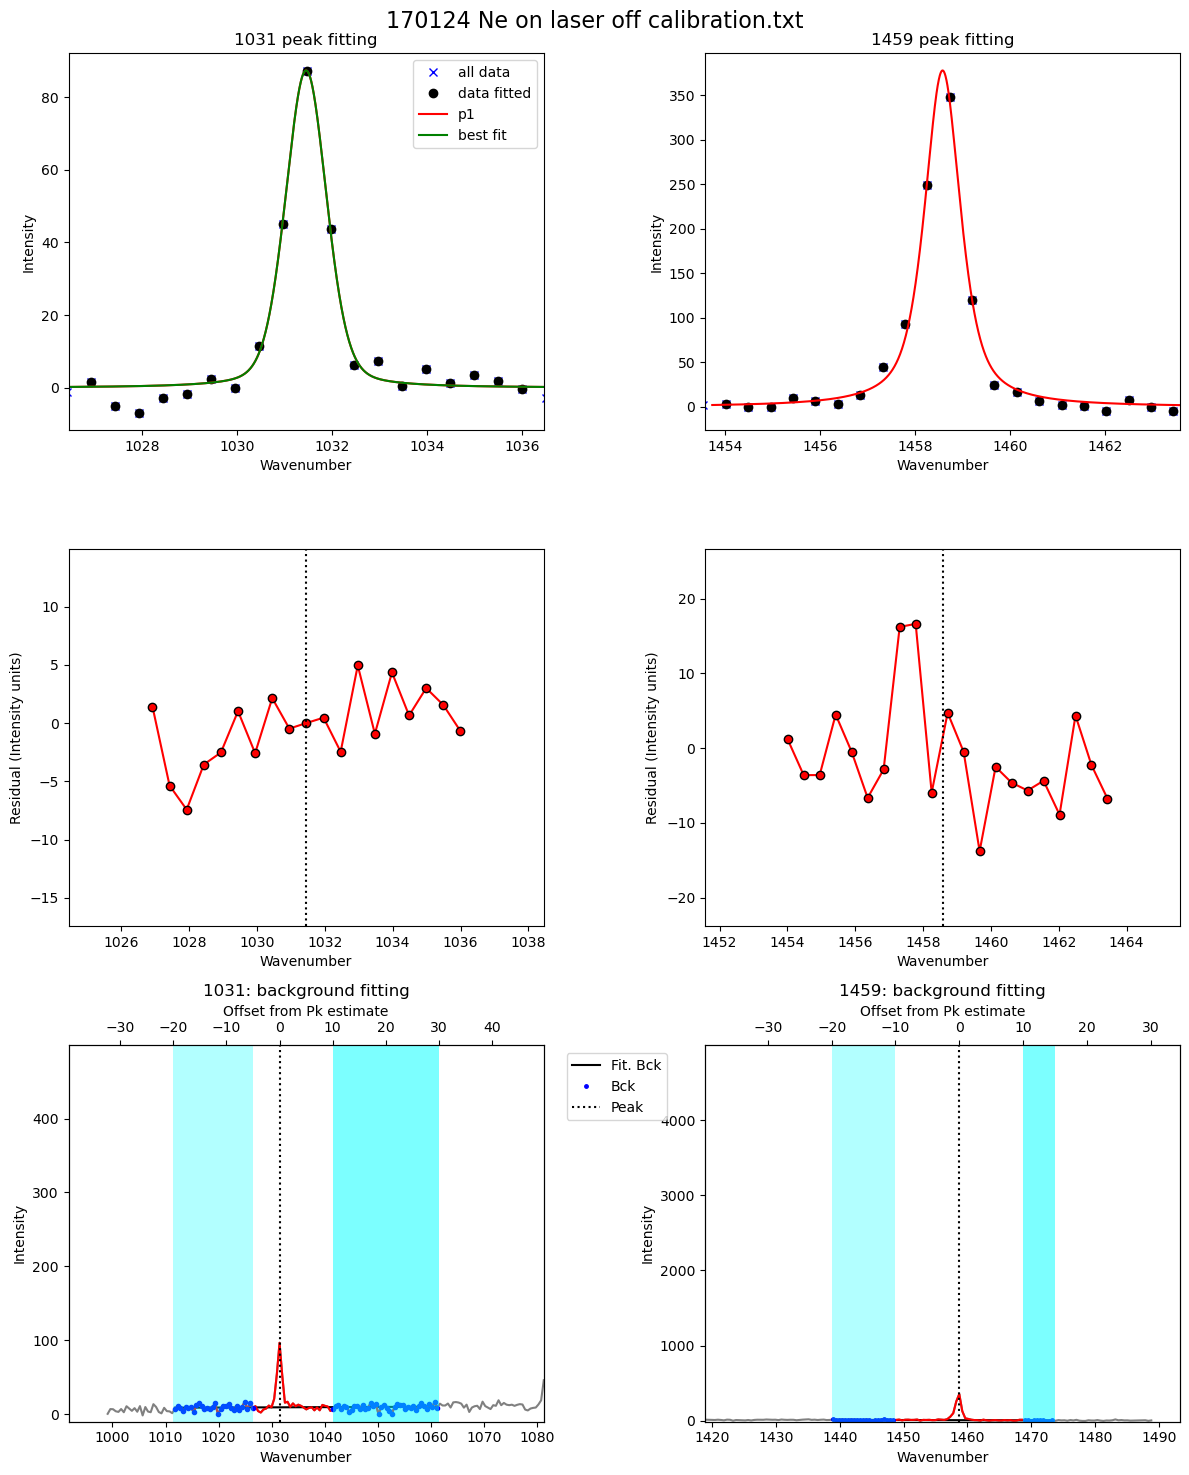

In [24]:
df2=pf.loop_Ne_lines(files=Ne_files, spectra_path=spectra_path, 
filetype=filetype, config_ID_peaks=Neon_id_config, config=Ne_Config_est,
df_fit_params=df_fit_params,  prefix=prefix,                   
plot_figure=True, const_params=True)


## Now extract metadata to get a timestamp for each file

In [25]:
## Get meta files
Ne_files_meta=pf.get_files(path=meta_path,
file_ext='txt', ID_str='Ne', 
exclude_str=['diad'], sort=False)

Ne_files_meta[0:5]

['170117 1353 Ne on laser off.txt',
 '170117 1403 Ne on laser off.txt',
 '170117 1412 Ne on laser off.txt',
 '170117 1419 Ne on laser off.txt',
 '170117 1432 Ne on laser off.txt']

In [28]:
meta=pf.loop_convert_datastamp_to_metadata(path=spectra_path, 
files=Ne_files, creation=True,
modification=False)
meta.reset_index(drop=True)

filename            date  Month  Day  \
0          170117 1353 Ne on laser off.txt  March 29, 2022  March   29   
1          170124 1020 Ne on laser off.txt  March 29, 2022  March   29   
2          170124 1005 Ne on laser off.txt  March 29, 2022  March   29   
3          170124 0935 Ne on laser off.txt  March 29, 2022  March   29   
4          170124 0922 Ne on laser off.txt  March 29, 2022  March   29   
5          170124 0907 Ne on laser off.txt  March 29, 2022  March   29   
6          170117 1548 Ne on laser off.txt  March 29, 2022  March   29   
7          170117 1541 Ne on laser off.txt  March 29, 2022  March   29   
8          170117 1534 Ne on laser off.txt  March 29, 2022  March   29   
9          170117 1526 Ne on laser off.txt  March 29, 2022  March   29   
10         170117 1516 Ne on laser off.txt  March 29, 2022  March   29   
11         170124 1027 Ne on laser off.txt  March 29, 2022  March   29   
12         170124 1012 Ne on laser off.txt  March 29, 2022  March   29   
13         170117 1457 Ne on laser off.txt  March 29, 2022  March   29   
14         170117 1450 Ne on laser off.txt  March 29, 2022  March   29   
15         170117 1432 Ne on laser off.txt  March 29, 2022  March   29   
16         170117 1419 Ne on laser off.txt  March 29, 2022  March   29   
17         170117 1412 Ne on laser off.txt  March 29, 2022  March   29   
18         170117 1403 Ne on laser off.txt  March 29, 2022  March   29   
19         170117 1503 Ne on laser off.txt  March 29, 2022  March   29   
20         170117 1509 Ne on laser off.txt  March 29, 2022  March   29   
21         170124 0915 Ne on laser off.txt  March 29, 2022  March   29   
22         170124 0929 Ne on laser off.txt  March 29, 2022  March   29   
23         170124 0945 Ne on laser off.txt  March 29, 2022  March   29   
24  170124 Ne on laser off calibration.txt  March 29, 2022  March   29   

    power (mW)  Int_time (s)  accumulations  Mag (X)  duration 24hr_time  \
0          NaN           NaN            NaN      NaN       NaN   7:17:22   
1          NaN           NaN            NaN      NaN       NaN   7:17:22   
2          NaN           NaN            NaN      NaN       NaN   7:17:22   
3          NaN           NaN            NaN      NaN       NaN   7:17:22   
4          NaN           NaN            NaN      NaN       NaN   7:17:22   
5          NaN           NaN            NaN      NaN       NaN   7:17:22   
6          NaN           NaN            NaN      NaN       NaN   7:17:22   
7          NaN           NaN            NaN      NaN       NaN   7:17:22   
8          NaN           NaN            NaN      NaN       NaN   7:17:22   
9          NaN           NaN            NaN      NaN       NaN   7:17:22   
10         NaN           NaN            NaN      NaN       NaN   7:17:22   
11         NaN           NaN            NaN      NaN       NaN   7:17:22   
12         NaN           NaN            NaN      NaN       NaN   7:17:22   
13         NaN           NaN            NaN      NaN       NaN   7:17:22   
14         NaN           NaN            NaN      NaN       NaN   7:17:22   
15         NaN           NaN            NaN      NaN       NaN   7:17:22   
16         NaN           NaN            NaN      NaN       NaN   7:17:22   
17         NaN           NaN            NaN      NaN       NaN   7:17:22   
18         NaN           NaN            NaN      NaN       NaN   7:17:22   
19         NaN           NaN            NaN      NaN       NaN   7:17:22   
20         NaN           NaN            NaN      NaN       NaN   7:17:22   
21         NaN           NaN            NaN      NaN       NaN   7:17:22   
22         NaN           NaN            NaN      NaN       NaN   7:17:22   
23         NaN           NaN            NaN      NaN       NaN   7:17:22   
24         NaN           NaN            NaN      NaN       NaN   7:17:22   

    sec since midnight  Spectral Center  
0                26242              NaN  
1                26242              NaN  
2     

In [29]:
# This is getting the metadata file names.  Check here the prefix has been removed. 
file_m=pf.extracting_filenames_generic(names=meta['filename'], 
   file_ext='.txt')
file_m

good job, no duplicate file names


array(['170117 1353 Ne on laser off', '170124 1020 Ne on laser off',
       '170124 1005 Ne on laser off', '170124 0935 Ne on laser off',
       '170124 0922 Ne on laser off', '170124 0907 Ne on laser off',
       '170117 1548 Ne on laser off', '170117 1541 Ne on laser off',
       '170117 1534 Ne on laser off', '170117 1526 Ne on laser off',
       '170117 1516 Ne on laser off', '170124 1027 Ne on laser off',
       '170124 1012 Ne on laser off', '170117 1457 Ne on laser off',
       '170117 1450 Ne on laser off', '170117 1432 Ne on laser off',
       '170117 1419 Ne on laser off', '170117 1412 Ne on laser off',
       '170117 1403 Ne on laser off', '170117 1503 Ne on laser off',
       '170117 1509 Ne on laser off', '170124 0915 Ne on laser off',
       '170124 0929 Ne on laser off', '170124 0945 Ne on laser off',
       '170124 Ne on laser off calibration'], dtype=object)

In [30]:
# This is getting the spectra file names. Check that they are in the same format as the metadataones above, this is what you need to successfully stitch together. 
file_s=pf.extracting_filenames_generic(names=df2['filename'],
   file_ext='.txt')
file_s

good job, no duplicate file names


array(['170117 1353 Ne on laser off', '170117 1403 Ne on laser off',
       '170117 1412 Ne on laser off', '170117 1419 Ne on laser off',
       '170117 1432 Ne on laser off', '170117 1450 Ne on laser off',
       '170117 1457 Ne on laser off', '170117 1503 Ne on laser off',
       '170117 1509 Ne on laser off', '170117 1516 Ne on laser off',
       '170117 1526 Ne on laser off', '170117 1534 Ne on laser off',
       '170117 1541 Ne on laser off', '170117 1548 Ne on laser off',
       '170124 0907 Ne on laser off', '170124 0915 Ne on laser off',
       '170124 0922 Ne on laser off', '170124 0929 Ne on laser off',
       '170124 0935 Ne on laser off', '170124 0945 Ne on laser off',
       '170124 1005 Ne on laser off', '170124 1012 Ne on laser off',
       '170124 1020 Ne on laser off', '170124 1027 Ne on laser off',
       '170124 Ne on laser off calibration'], dtype=object)

## Combine 2 dataframes
- Here we add a new column to each dataframe with these stripped back names, and then merge the 2 dataframes

In [46]:
meta['name_for_matching']=file_m
df2['name_for_matching']=file_s
df_combo=df2.merge(meta, on='name_for_matching')
df_combo['sec_after_midnight']=df_combo.index*30000

In [43]:
df_combo.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24],
           dtype='int64')

## Now lets inspect changes in Ne correction factor with time
- Normally, you can spot outliers this way

In [44]:
df_combo_sort=df_combo.sort_values(by='sec since midnight')
df_combo_sort.to_excel('PseudoVoigt.xlsx')

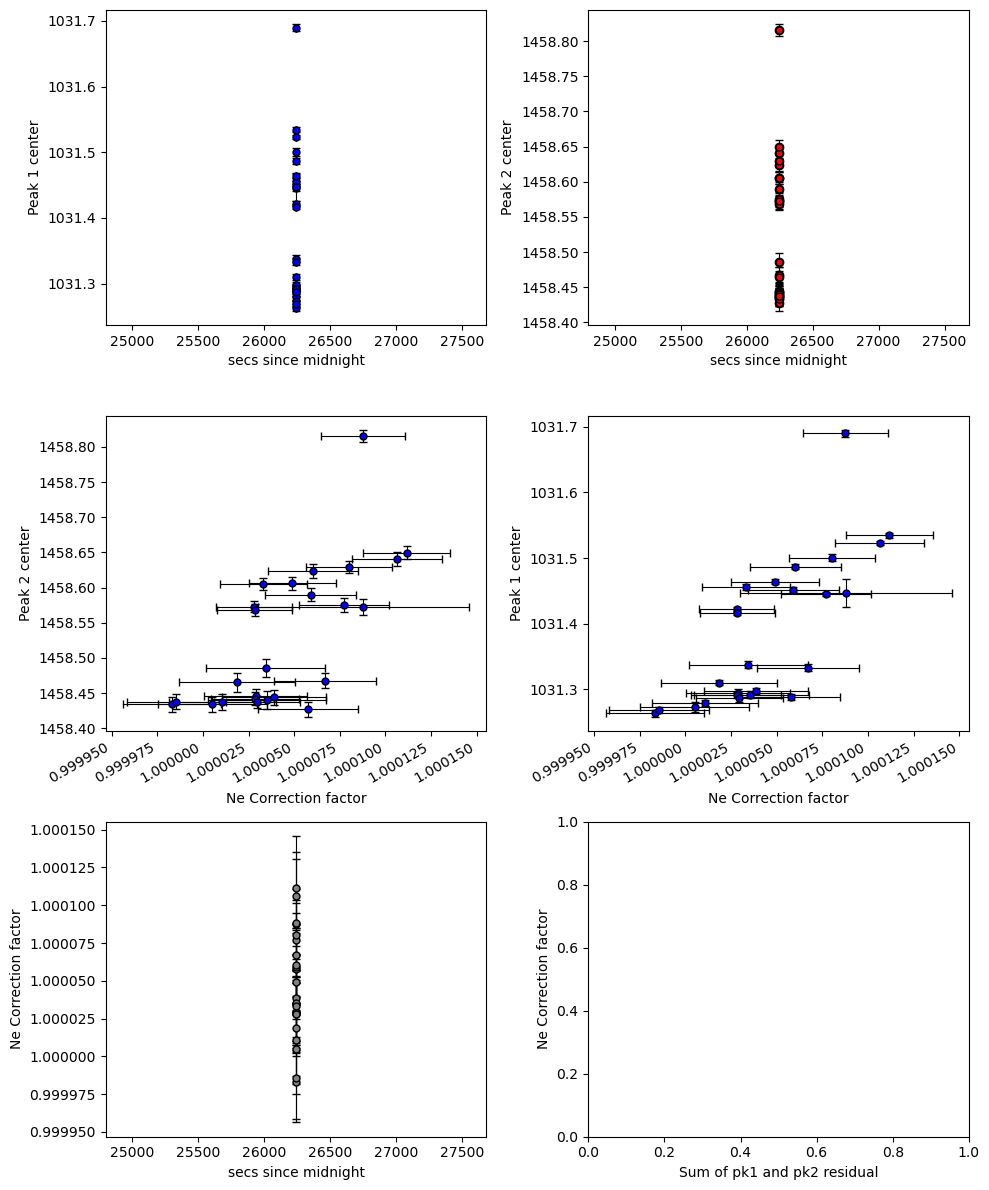

In [45]:
fig=pf.plot_Ne_corrections(df=df_combo, x_axis=df_combo['sec since midnight'],
                      x_label='secs since midnight')


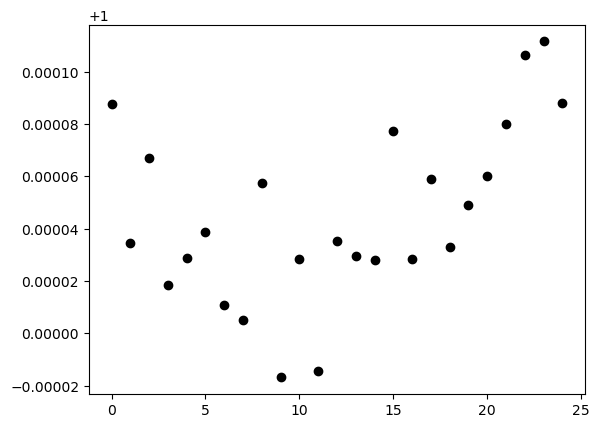

In [49]:
plt.plot(df_combo['Ne_Corr'].index, df_combo['Ne_Corr'], 'ok')

## Exclude ones that don't look right...
- The filter_Ne_Line_neighbours excludes Ne lines that have a correction factor more than "offset" from their N neighbours (defined by "number_av")
- Tweak offset and number_av until you exclude the ones that dont look right
- Smaller number of offset - more discarded
- If you notice really bad fits, you can also exclude certain files like file_name_filt=['Ne_line_1.txt'], or file_name_filt=['Ne_line_2.txt', 'Ne_line_5.txt']

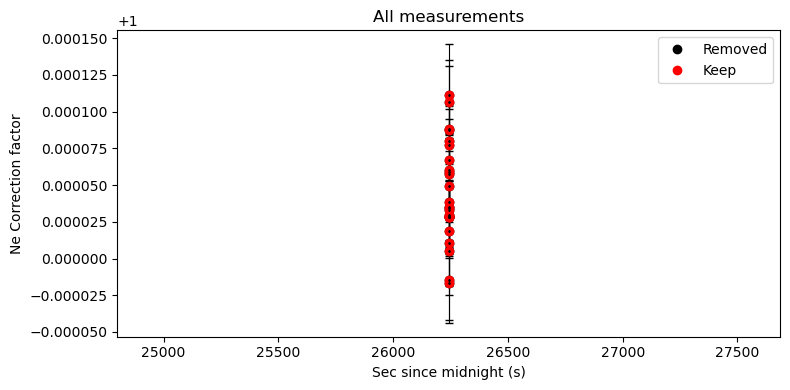

In [36]:
# You can see there is no coherent trends, whcih is why we decided not to use Ne lines for the Cambridge raman
# The peak fits are too noisy. 
filt=pf.filter_Ne_Line_neighbours(df_combo=df_combo, 
                    number_av=3, offset=0.0005, file_name_filt=None)
# Now lets plot this to see
fig, (ax1) = plt.subplots(1, 1, figsize=(8,4))
ax1.errorbar(df_combo['sec since midnight'], df_combo['Ne_Corr'], xerr=0, 
yerr=df_combo['1σ_Ne_Corr'], fmt='d', ecolor='k', elinewidth=0.8, mfc='cyan', ms=1, mec='k', capsize=3)
ax1.plot(df_combo['sec since midnight'], df_combo['Ne_Corr'],   'ok', label='Removed')
ax1.plot(df_combo['sec since midnight'], filt,  'or', label='Keep')

ax1.legend()

ax1.set_xlabel('Sec since midnight (s)')
ax1.set_ylabel('Ne Correction factor')
ax1.set_title('All measurements')

fig.tight_layout()

## Now lets make a regression against time
- We take this time regression and then apply to our diad fits

C:\Users\penny\AppData\Local\Temp\ipykernel_30508\3704963048.py:5: RankWarning: Polyfit may be poorly conditioned
  pf.generate_Ne_corr_model(time=df_combo['sec since midnight'].loc[keep], Ne_corr=df_combo.loc[keep],


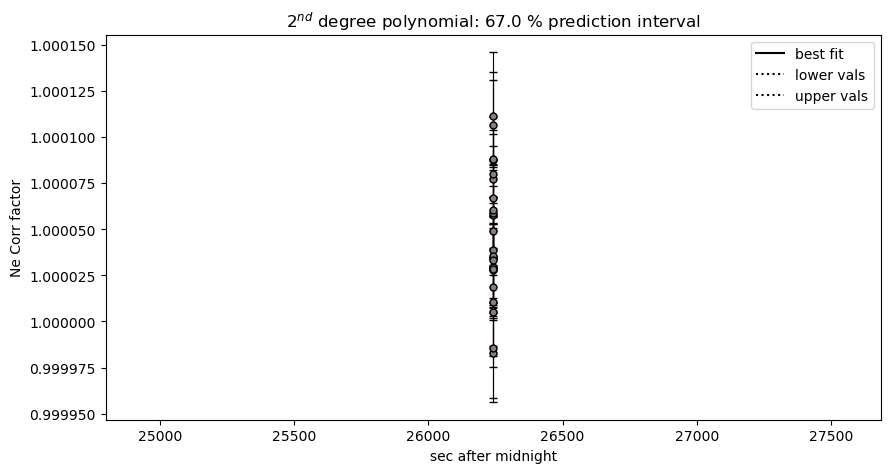

In [37]:

big_err=df_combo['1σ_Ne_Corr']>0.001
## Lets get filtered ones
keep=(filt>0)&(~big_err)

pf.generate_Ne_corr_model(time=df_combo['sec since midnight'].loc[keep], Ne_corr=df_combo.loc[keep], 
N_poly=2, CI=0.67, pkl_name='Neon_corr_model.pkl')
